<a href="https://colab.research.google.com/github/NilarghyaDebnath/Machine-Learning/blob/main/ND%7CSupervisedLearning__Retail_sales_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Sales Prediction : Predicting sales of a major store chain Rossmann</u></b>

## <b> Problem Description </b>



### Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

### You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

## <b> Data Description </b>

### <b>Rossmann Stores Data.csv </b> - historical data including Sales
### <b>store.csv </b> - supplemental information about the stores


### <b><u>Data fields</u></b>
### Most of the fields are self-explanatory. The following are descriptions for those that aren't.

* #### Id - an Id that represents a (Store, Date) duple within the test set
* #### Store - a unique Id for each store
* #### Sales - the turnover for any given day (this is what you are predicting)
* #### Customers - the number of customers on a given day
* #### Open - an indicator for whether the store was open: 0 = closed, 1 = open
* #### StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* #### SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
* #### StoreType - differentiates between 4 different store models: a, b, c, d
* #### Assortment - describes an assortment level: a = basic, b = extra, c = extended
* #### CompetitionDistance - distance in meters to the nearest competitor store
* #### CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* #### Promo - indicates whether a store is running a promo on that day
* #### Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* #### Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* #### PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

In [ ]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import missingno as msno
import matplotlib
import matplotlib.pylab as pylab
import pylab
from scipy import stats

%matplotlib inline
matplotlib.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 8,6

import math
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import LassoLars
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import ElasticNet

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
rossmann_df = pd.read_csv('/content/drive/MyDrive/Rossmann Stores Data.csv')
store_df = pd.read_csv('/content/drive/MyDrive/store.csv')

<ipython-input-5-9a23b381baee>:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  rossmann_df = pd.read_csv('/content/drive/MyDrive/Rossmann Stores Data.csv')


## <b> Understanding the Rossmann Dataset </b>

In [ ]:
pd.set_option('display.max_columns', None)
rossmann_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [ ]:
rossmann_df.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


In [ ]:
rossmann_df.shape

(1017209, 9)

In [ ]:
list(rossmann_df.columns)

['Store',
 'DayOfWeek',
 'Date',
 'Sales',
 'Customers',
 'Open',
 'Promo',
 'StateHoliday',
 'SchoolHoliday']

In [ ]:
rossmann_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [ ]:
rossmann_df.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [ ]:
rossmann_df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [ ]:
#No. Of Stores in the Dataset
rossmann_df.nunique()

Store             1115
DayOfWeek            7
Date               942
Sales            21734
Customers         4086
Open                 2
Promo                2
StateHoliday         5
SchoolHoliday        2
dtype: int64

In [ ]:
for column in rossmann_df.columns:
    print("Column:", column)
    # Check if the column is of object data type
    if rossmann_df[column].dtype == 'object':
        # Calculate value counts and sort alphabetically
        sorted_value_counts = rossmann_df[column].value_counts().sort_values()
    else:
        # For non-object types, sort by index (values)
        sorted_value_counts = rossmann_df[column].value_counts().sort_index()
    print(sorted_value_counts)
    print()


Column: Store
Store
1       942
2       942
3       942
4       942
5       942
       ... 
1111    942
1112    942
1113    942
1114    942
1115    942
Name: count, Length: 1115, dtype: int64

Column: DayOfWeek
DayOfWeek
1    144730
2    145664
3    145665
4    145845
5    145845
6    144730
7    144730
Name: count, dtype: int64

Column: Date
Date
2014-12-08     935
2014-07-03     935
2014-07-04     935
2014-07-05     935
2014-07-06     935
              ... 
2013-01-06    1115
2013-01-05    1115
2013-01-04    1115
2013-01-16    1115
2014-04-15    1115
Name: count, Length: 942, dtype: int64

Column: Sales
Sales
0        172871
46            1
124           1
133           1
286           1
          ...  
38037         1
38367         1
38484         1
38722         1
41551         1
Name: count, Length: 21734, dtype: int64

Column: Customers
Customers
0       172869
3            1
5            1
8            1
13           1
         ...  
5297         1
5387         1
5458         1


## EDA on the Rossmann Dataset </b>

In [ ]:
# Value_counts of StateHoliday Column
rossmann_df['StateHoliday'].value_counts()

StateHoliday
0    855087
0    131072
a     20260
b      6690
c      4100
Name: count, dtype: int64

In [ ]:
rossmann_df.loc[rossmann_df['StateHoliday'] == '0', 'StateHoliday'] = 0

In [ ]:
# Value_counts of StateHoliday Column
rossmann_df['StateHoliday'].value_counts()

StateHoliday
0    986159
a     20260
b      6690
c      4100
Name: count, dtype: int64

In [ ]:
# extract year, month, day and week of year from "Date"

rossmann_df['Date']=pd.to_datetime(rossmann_df['Date'])
rossmann_df['Year'] = rossmann_df['Date'].apply(lambda x: x.year)
rossmann_df['Month'] = rossmann_df['Date'].apply(lambda x: x.month)
rossmann_df['Day'] = rossmann_df['Date'].apply(lambda x: x.day)
rossmann_df['WeekOfYear'] = rossmann_df['Date'].apply(lambda x: x.weekofyear)

In [ ]:
print('initial', rossmann_df['Date'].min())
print('final', rossmann_df['Date'].max())

initial 2013-01-01 00:00:00
final 2015-07-31 00:00:00


**It shows that we have sales data of almost 3 years.**


In [ ]:
rossmann_df.sort_values(by = ['Date', "Store"], inplace = True)
rossmann_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear
1016095,1,2,2013-01-01,0,0,0,0,a,1,2013,1,1,1
1016096,2,2,2013-01-01,0,0,0,0,a,1,2013,1,1,1
1016097,3,2,2013-01-01,0,0,0,0,a,1,2013,1,1,1
1016098,4,2,2013-01-01,0,0,0,0,a,1,2013,1,1,1
1016099,5,2,2013-01-01,0,0,0,0,a,1,2013,1,1,1


In [ ]:
rossmann_df.shape

(1017209, 13)

<Axes: >

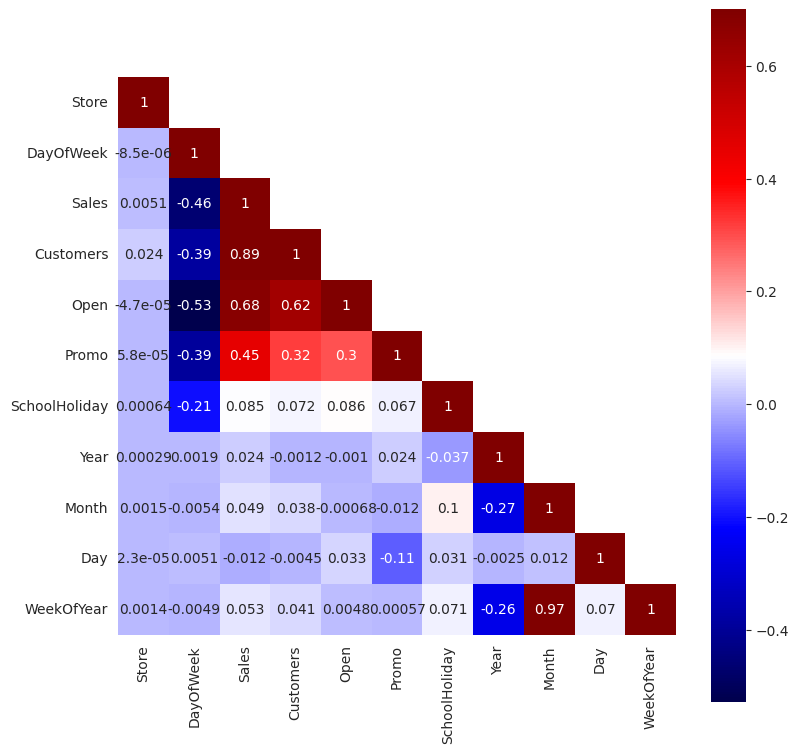

In [ ]:
correlation_map = rossmann_df.corr(numeric_only=True)
obj = np.array(correlation_map)
obj[np.tril_indices_from(obj)] = False
fig,ax= plt.subplots()
fig.set_size_inches(9,9)
sns.heatmap(correlation_map,mask=obj, vmax=.7, square=True, cmap='seismic',annot=True)

<Axes: xlabel='DayOfWeek', ylabel='count'>

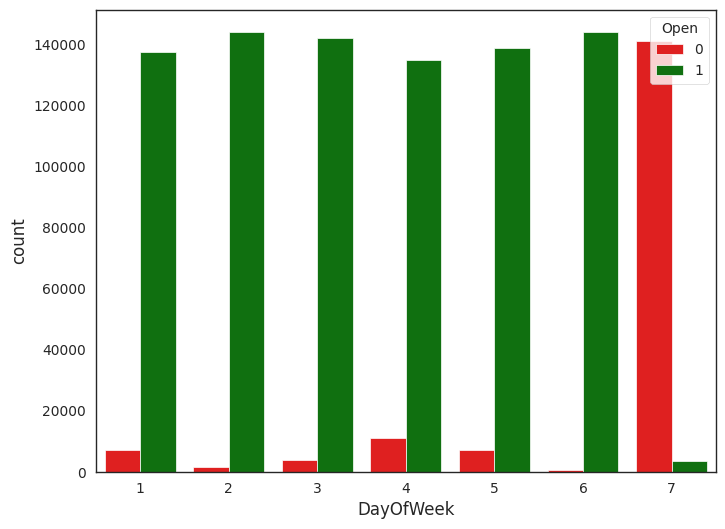

In [ ]:
custom_palette = ["red","green"]
sns.countplot(x = 'DayOfWeek', hue = "Open",  data = rossmann_df, palette=custom_palette)

**As we can see in the graph shown above that Stores mainly closed on Sunday.**

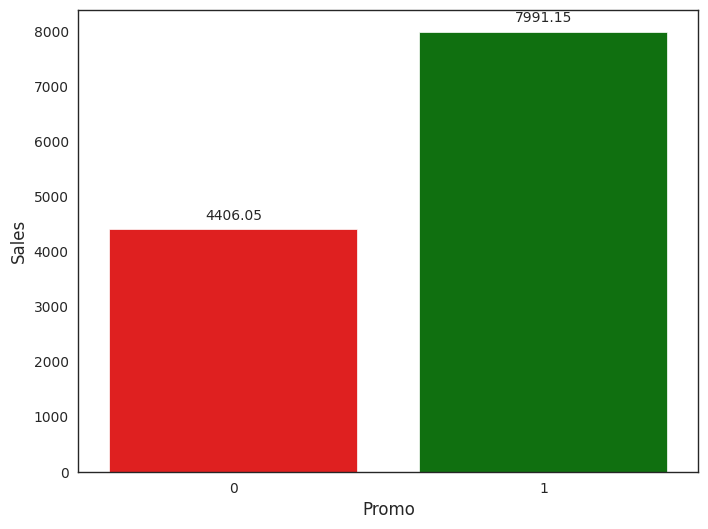

In [ ]:
# Grouping by 'Promo' and calculating the mean of 'Sales'
promo_sales = pd.DataFrame(rossmann_df.groupby('Promo').agg({'Sales':'mean'}))

# Setting the size of the plot
plt.figure(figsize=(8, 6))  # Adjust the values as per your requirement

# Creating the bar plot
ax = sns.barplot(x='Promo', y='Sales', data=promo_sales, palette=["red", 'green'], hue='Promo', hue_order=[0, 1], legend=False)

# Annotate each bar with its count
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Show the plot
plt.show()

**Average Sales are nearly doubled When Promo is Running**

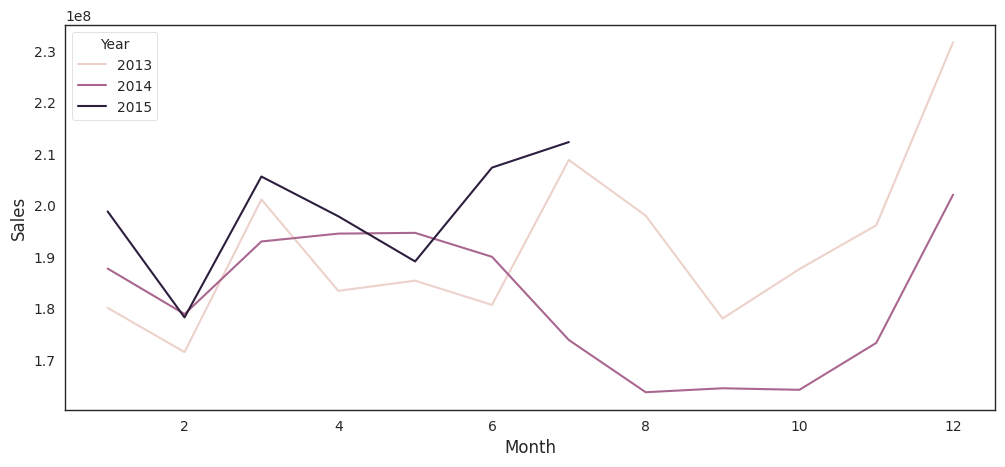

In [ ]:
# Grouping the data by 'Year' and 'Month' and summing the sales
monthly_sales = rossmann_df.groupby(['Year', 'Month'])['Sales'].sum().reset_index()

# Setting the size of the plot
plt.figure(figsize=(12, 5))

# Setting up the plot
sns.lineplot(x='Month', y='Sales', hue='Year', data=monthly_sales)

# Adding legend
plt.legend(title='Year', loc='upper left')

# Show the plot
plt.show()

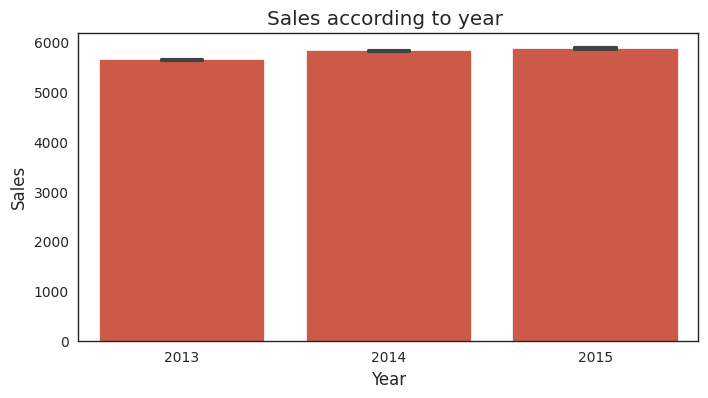

In [ ]:
fig,ax=plt.subplots(figsize=(8,4))
sns.barplot(data=rossmann_df,x='Year',y='Sales',ax=ax,capsize=.2)
ax.set(title='Sales according to year ')
plt.show()

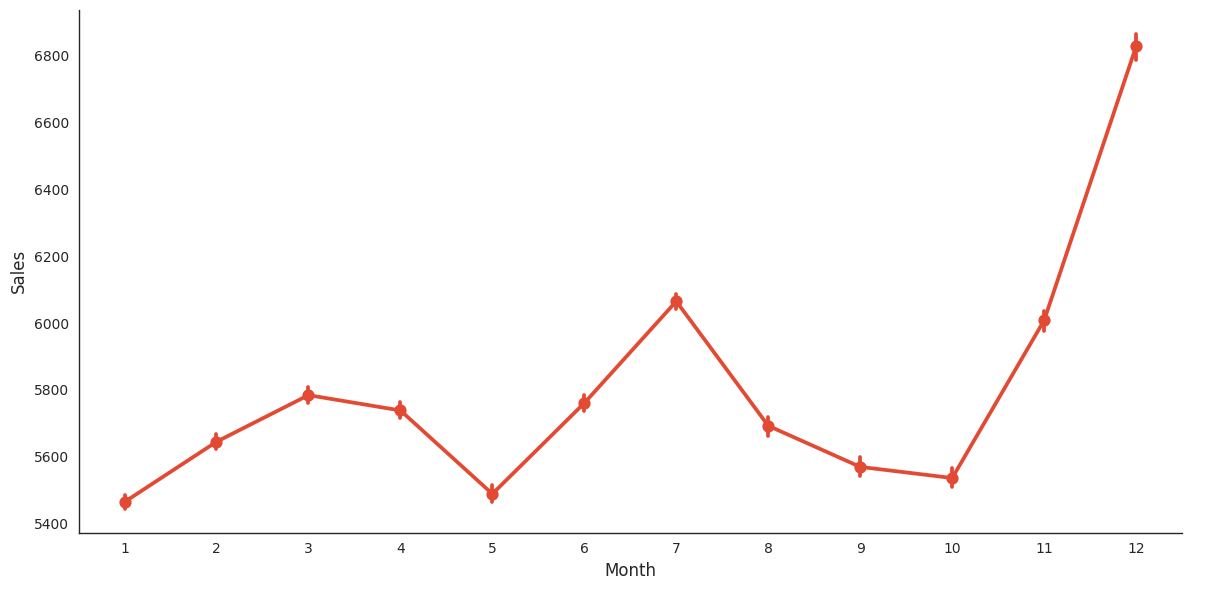

In [ ]:
sns.catplot(x="Month", y="Sales", data=rossmann_df, kind="point", aspect=2, height = 6)
plt.show()

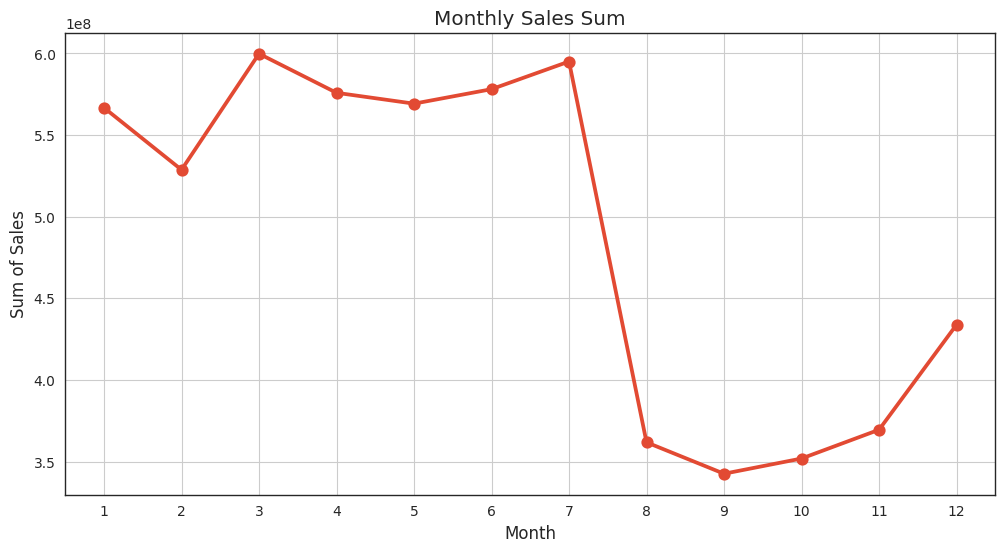

In [ ]:
# Pre-aggregate the data to calculate the sum of sales for each month
monthly_sales_sum = rossmann_df.groupby('Month')['Sales'].sum().reset_index()

# Create the plot
plt.figure(figsize=(12, 6))
sns.pointplot(x='Month', y='Sales', data=monthly_sales_sum)
plt.title('Monthly Sales Sum')
plt.xlabel('Month')
plt.ylabel('Sum of Sales')
plt.grid(True)
plt.show()


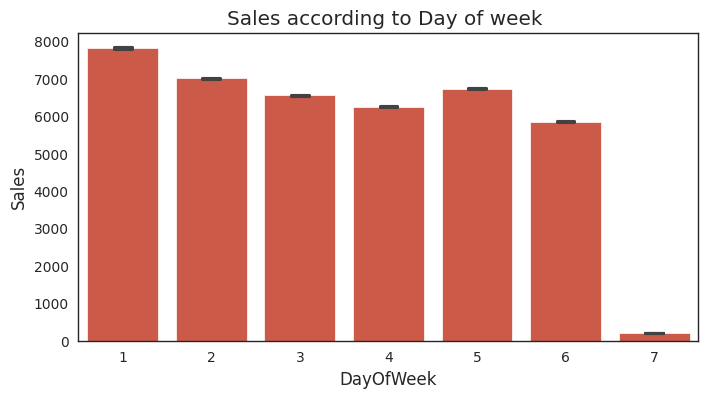

In [ ]:
fig,ax=plt.subplots(figsize=(8,4))
sns.barplot(data=rossmann_df,x='DayOfWeek',y='Sales',ax=ax,capsize=.2)
ax.set(title='Sales according to Day of week ')
plt.show()

**As We can see that In the month of November and Specially in December Sales is increasing Rapidly every year.**

In [ ]:
# Value Counts of SchoolHoliday Column
rossmann_df.SchoolHoliday.value_counts()

SchoolHoliday
0    835488
1    181721
Name: count, dtype: int64

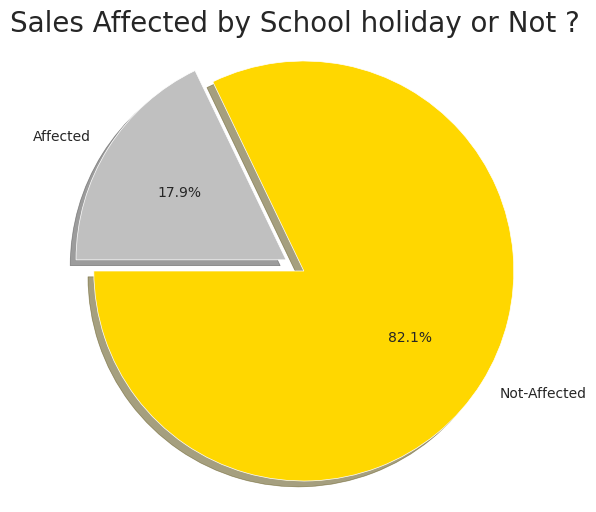

In [ ]:
labels = 'Not-Affected' , 'Affected'
sizes = rossmann_df.SchoolHoliday.value_counts()
colors = ['gold', 'silver']
explode = (0.1, 0.0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=180)
plt.axis('equal')
plt.title("Sales Affected by School holiday or Not ?",fontsize=20)
plt.plot()
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.show()

**As we can see in the piechart above that 18% of total sales is affected by School Holiday.                                                                
                                                                   So we can conclude that Sales aren't afffected by School Holiday**

In [ ]:
#Transforming Variable StateHoliday
rossmann_df["StateHoliday"] = rossmann_df["StateHoliday"].map({0: 0, "0": 0, "a": 1, "b": 1, "c": 1})

In [ ]:
rossmann_df.StateHoliday.value_counts()

StateHoliday
0    986159
1     31050
Name: count, dtype: int64

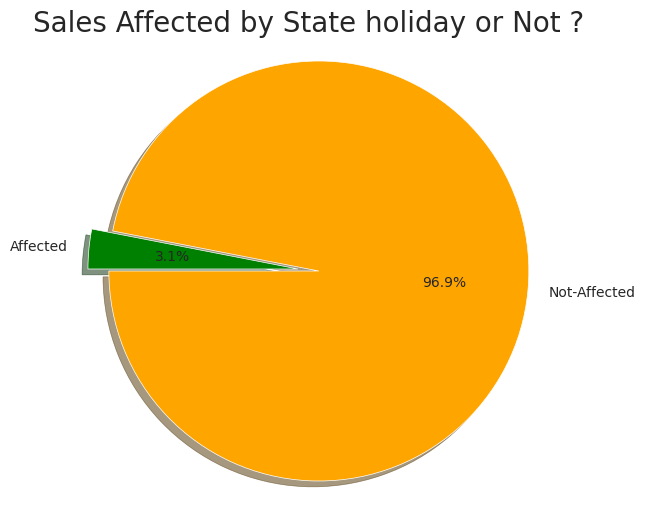

In [ ]:
labels = 'Not-Affected' , 'Affected'
sizes = rossmann_df.StateHoliday.value_counts()
colors = ['orange','green']
explode = (0.1, 0.0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=180)
plt.axis('equal')
plt.title("Sales Affected by State holiday or Not ?",fontsize=20)
plt.plot()
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.show()

**As we can see in the piechart above that Sales affected by State Holiday is only 3.1%, means Sales aren't afffected much by State Holiday. So I'm removing this column**

In [ ]:
rossmann_df.drop('StateHoliday',inplace=True,axis=1)

In [ ]:
rossmann_df.head(1)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,SchoolHoliday,Year,Month,Day,WeekOfYear
1016095,1,2,2013-01-01,0,0,0,0,1,2013,1,1,1


Text(0.5, 1.0, 'Distribution of Sales numbers of the stores')

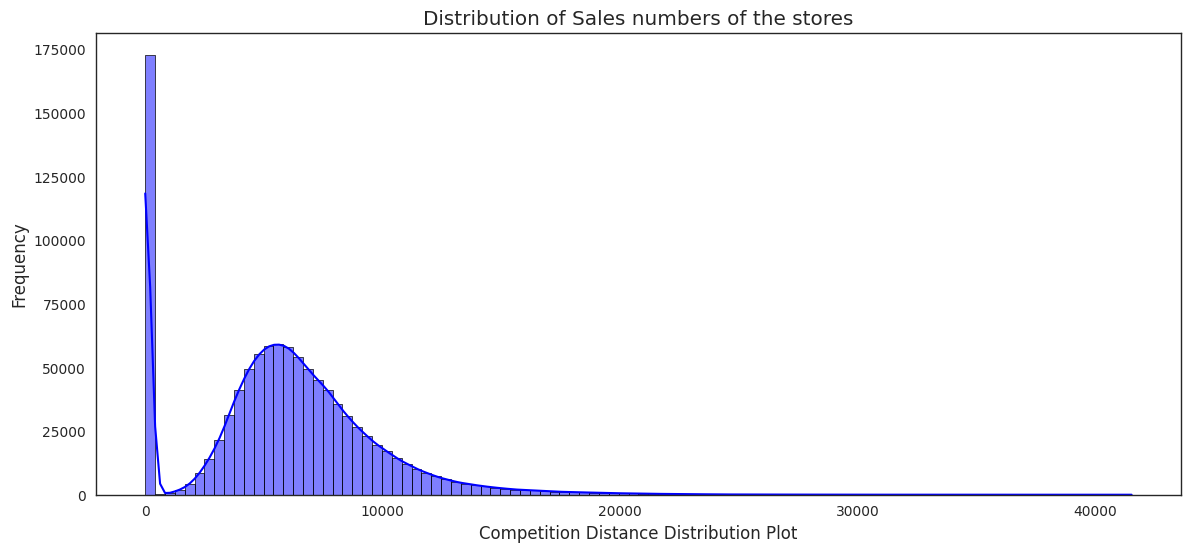

In [ ]:
plt.figure(figsize=(14, 6))
sns.histplot(x=rossmann_df['Sales'],bins = 100, kde = True, color='blue', edgecolor='black')
plt.xlabel('Competition Distance Distribution Plot')
plt.ylabel('Frequency')
plt.title('Distribution of Sales numbers of the stores')

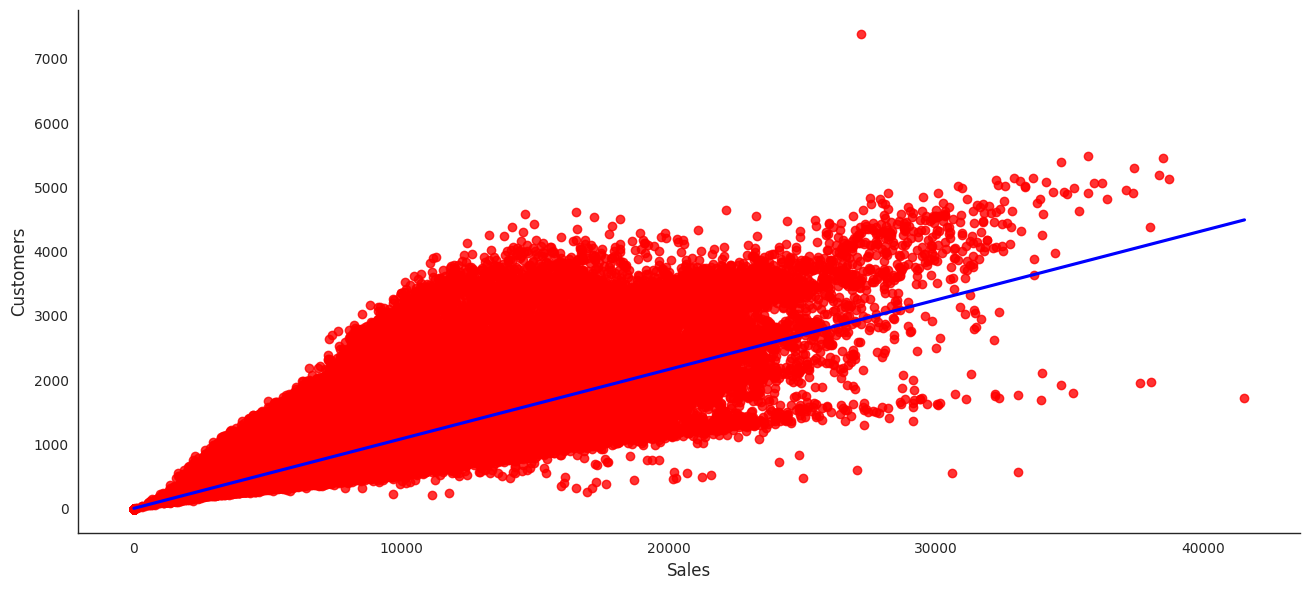

In [ ]:
#linear relation between sales and customers
sns.lmplot(x='Sales', y='Customers', data=rossmann_df, palette='seismic', height=6, aspect=2.2,
           scatter_kws={'color': 'red'}, line_kws={'color': 'blue'})

## <b> Understanding the Stores Dataset </b>

In [ ]:
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [ ]:
store_df.tail()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN
1114,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


In [ ]:
store_df.shape

(1115, 10)

In [ ]:
list(store_df.columns)

['Store',
 'StoreType',
 'Assortment',
 'CompetitionDistance',
 'CompetitionOpenSinceMonth',
 'CompetitionOpenSinceYear',
 'Promo2',
 'Promo2SinceWeek',
 'Promo2SinceYear',
 'PromoInterval']

In [ ]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [ ]:
store_df.nunique()

Store                        1115
StoreType                       4
Assortment                      3
CompetitionDistance           654
CompetitionOpenSinceMonth      12
CompetitionOpenSinceYear       23
Promo2                          2
Promo2SinceWeek                24
Promo2SinceYear                 7
PromoInterval                   3
dtype: int64

In [ ]:
for column in store_df.columns:
  print("Column:", column)
  if store_df[column].dtype == 'object':
    value_count = store_df[column].value_counts().sort_values()

  else:
    value_count = store_df[column].value_counts().sort_index()
  print(value_count)
  print()


Column: Store
Store
1       1
2       1
3       1
4       1
5       1
       ..
1111    1
1112    1
1113    1
1114    1
1115    1
Name: count, Length: 1115, dtype: int64

Column: StoreType
StoreType
b     17
c    148
d    348
a    602
Name: count, dtype: int64

Column: Assortment
Assortment
b      9
c    513
a    593
Name: count, dtype: int64

Column: CompetitionDistance
CompetitionDistance
20.0       1
30.0       4
40.0       5
50.0       8
60.0       3
          ..
45740.0    1
46590.0    1
48330.0    1
58260.0    1
75860.0    1
Name: count, Length: 654, dtype: int64

Column: CompetitionOpenSinceMonth
CompetitionOpenSinceMonth
1.0      14
2.0      41
3.0      70
4.0      94
5.0      44
6.0      50
7.0      67
8.0      39
9.0     125
10.0     61
11.0     92
12.0     64
Name: count, dtype: int64

Column: CompetitionOpenSinceYear
CompetitionOpenSinceYear
1900.0     1
1961.0     1
1990.0     5
1994.0     2
1995.0     2
1998.0     1
1999.0     8
2000.0    10
2001.0    16
2002.0    27
2003

In [ ]:
store_df.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


In [ ]:
store_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

## <b> EDA on the Store Dataset </b>

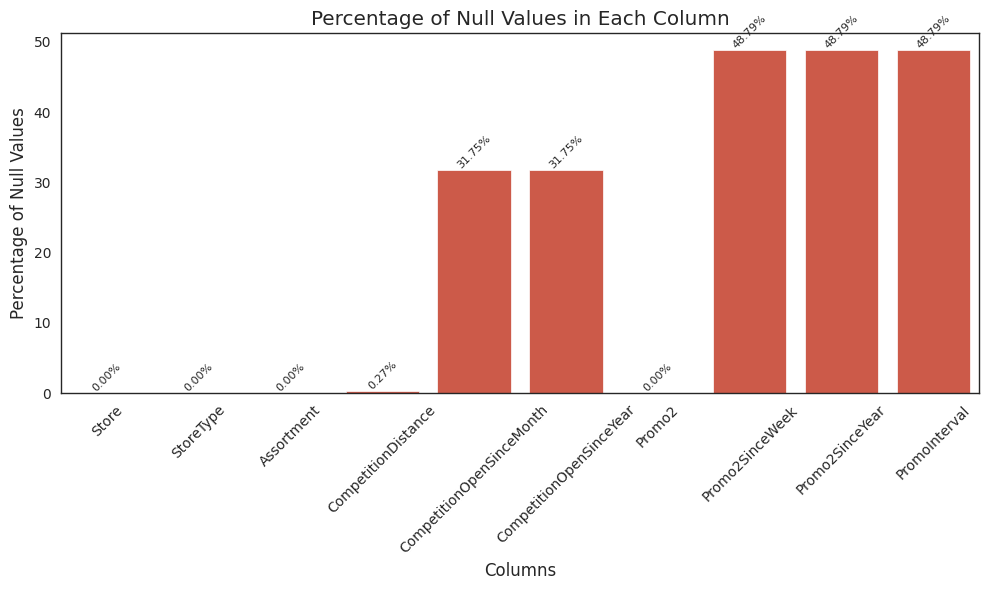

In [ ]:
# Calculate the percentage of null values in each column
null_percentage = (store_df.isnull().sum() / len(store_df)) * 100

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=null_percentage.index, y=null_percentage)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.xlabel('Columns')
plt.ylabel('Percentage of Null Values')
plt.title('Percentage of Null Values in Each Column')

# Add annotations
for index, value in enumerate(null_percentage):
    plt.text(index, value, f'{value:.2f}%', ha='center', va='bottom', rotation=45, fontsize=8)

# Rotating x-axis labels
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

There are many Nan values in columns - **'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear, Promointerval', 'Promo2sinceWeek' and 'Promo2sinceYear'**. Also **CompetitionDistance** has only 3 null values. we have to clean those data. Let's start checking....

In [ ]:
store_df[pd.isnull(store_df.CompetitionDistance)]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
621,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
878,879,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"


Text(0.5, 1.0, 'Distribution of Competition Distance')

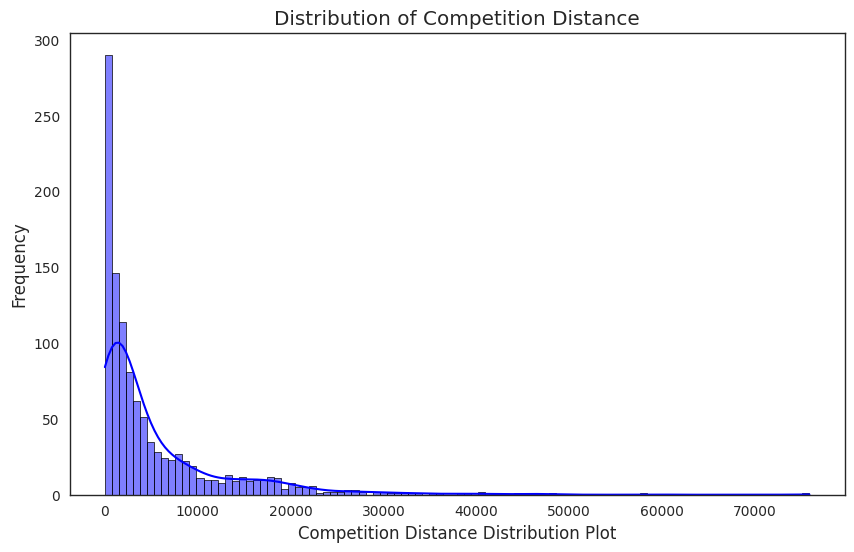

In [ ]:
# CompetitionDistance is distance in meters to the nearest competitor store
plt.figure(figsize = (10,6))
sns.histplot(x=store_df['CompetitionDistance'],bins = 100, kde = True, color='blue', edgecolor='black')
plt.xlabel('Competition Distance Distribution Plot')
plt.ylabel('Frequency')
plt.title('Distribution of Competition Distance')

It seems like most of the values of the CompetitionDistance are towards the left and the distribution is skewed on the right. Median is more robust to outlier effect.So we decide to fill null values with median.

In [ ]:
#Imputing Nan values in CompetitionDistance with median.
store_df['CompetitionDistance'].fillna(store_df['CompetitionDistance'].median(), inplace = True)

<Axes: xlabel='CompetitionOpenSinceMonth', ylabel='Count'>

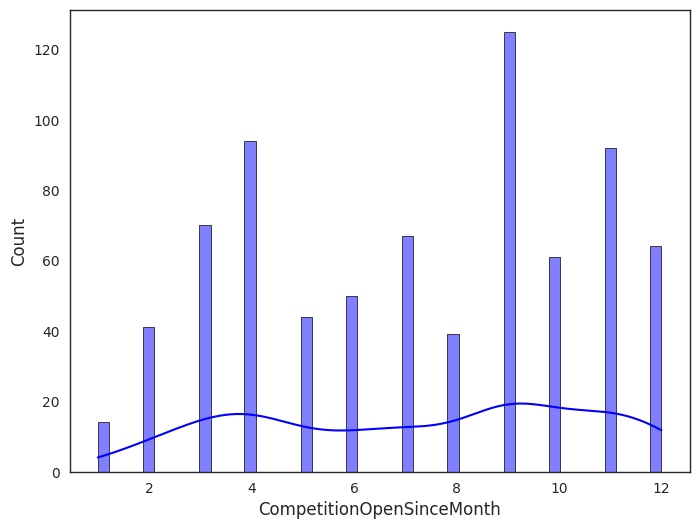

In [ ]:
sns.histplot(x = store_df['CompetitionOpenSinceMonth'], bins = 50, kde = True, color='blue', edgecolor='black')


<Axes: xlabel='CompetitionOpenSinceYear', ylabel='Count'>

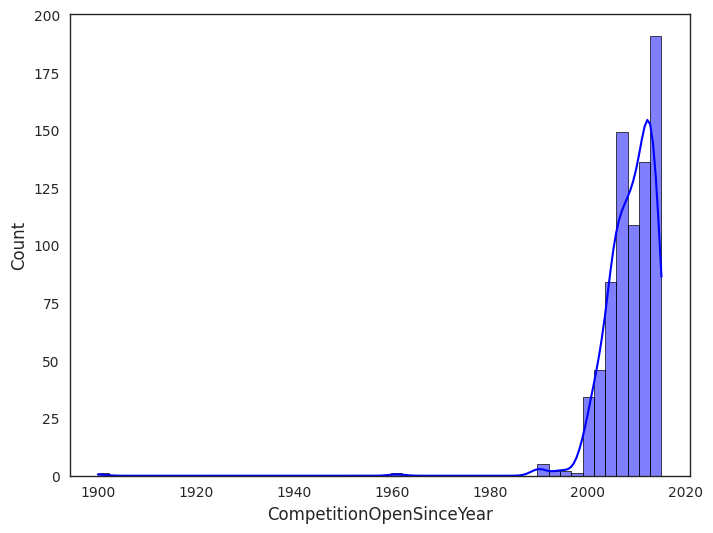

In [ ]:
sns.histplot(x = store_df['CompetitionOpenSinceYear'], bins = 50, kde = True, color='blue', edgecolor='black')

In [ ]:
# filling competition open since month and year with the most occuring values of the columns i.e modes of those columns
store_df['CompetitionOpenSinceMonth'].fillna(store_df['CompetitionOpenSinceMonth'].mode()[0], inplace = True)
store_df['CompetitionOpenSinceYear'].fillna(store_df['CompetitionOpenSinceYear'].mode()[0], inplace = True)

We observe from the dataset that the **Promo2** column has values equals to 0 and 1. And from the other three columns related to promos (Promo2SinceWeek, Promo2SinceYear, PromoInterval), it seems that the stores which do not want promotion they have null values in **Promo2SinceWeek, Promo2SinceYear and PromoInterval**. So for this purpose the best way to fill those features is to assign value equals to zero.

In [ ]:
# imputing the nan values of promo2 related columns with 0
store_df['Promo2SinceWeek'].fillna(value=0,inplace=True)
store_df['Promo2SinceYear'].fillna(value=0,inplace=True)
store_df['PromoInterval'].fillna(value=0,inplace=True)

In [ ]:
store_df.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

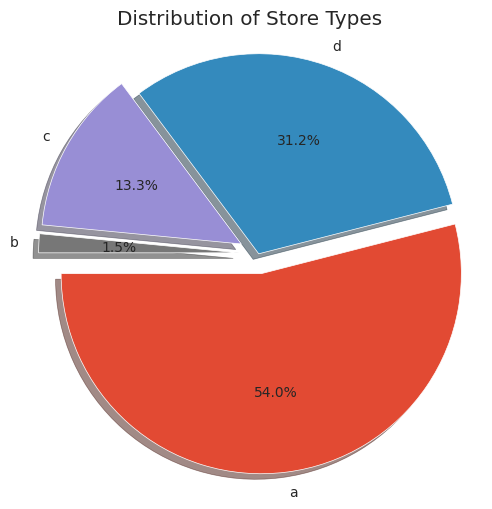

In [ ]:
store_type_counts = store_df['StoreType'].value_counts()

# Extracting labels and sizes for the pie chart
labels = store_type_counts.index
sizes = store_type_counts.values

# Plotting the pie chart
explode = (0.1, 0.0 , 0.1 , 0.1)
plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels,explode = explode, autopct='%1.1f%%', shadow = True, startangle=180)
plt.title('Distribution of Store Types')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

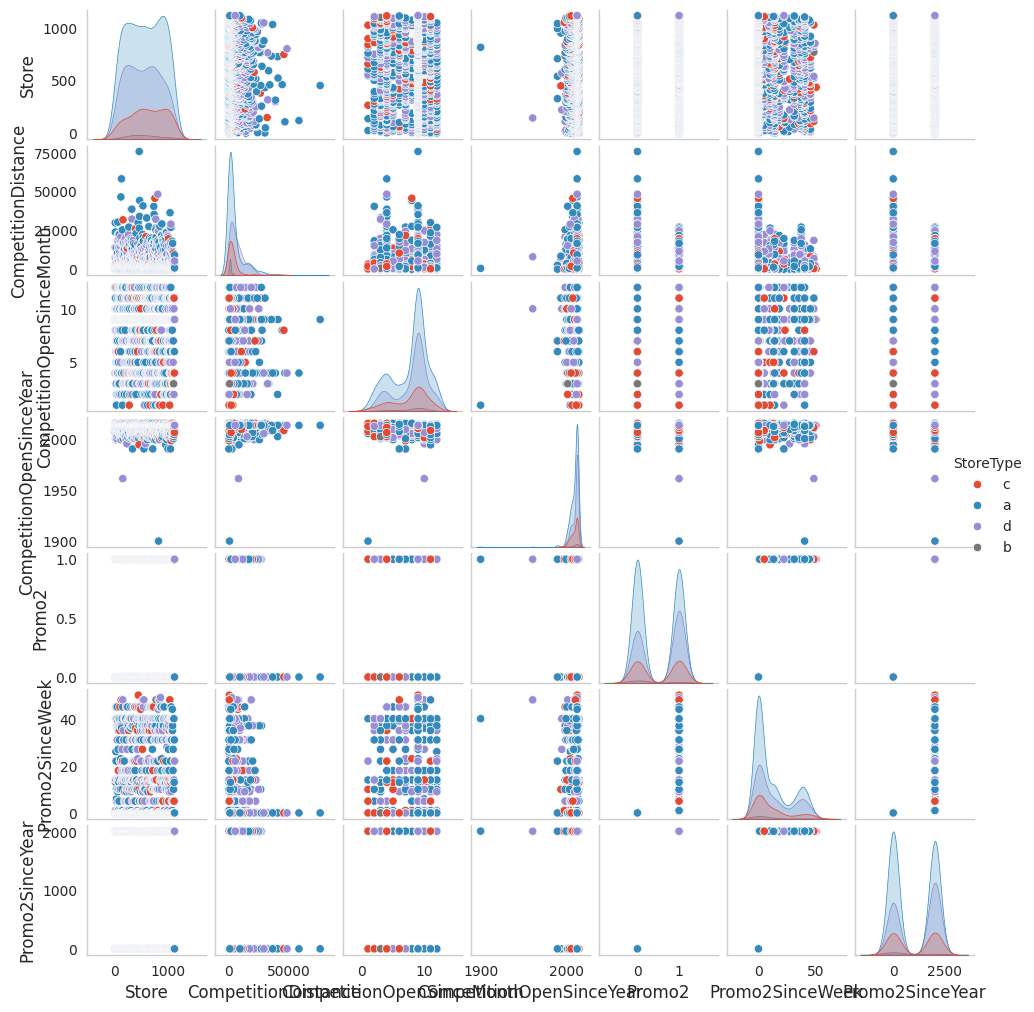

In [ ]:
#pairplot for store dataset
sns.set_style("whitegrid", {'axes.grid' : False})
pp=sns.pairplot(store_df,hue='StoreType')
pp.fig.set_size_inches(10,10)

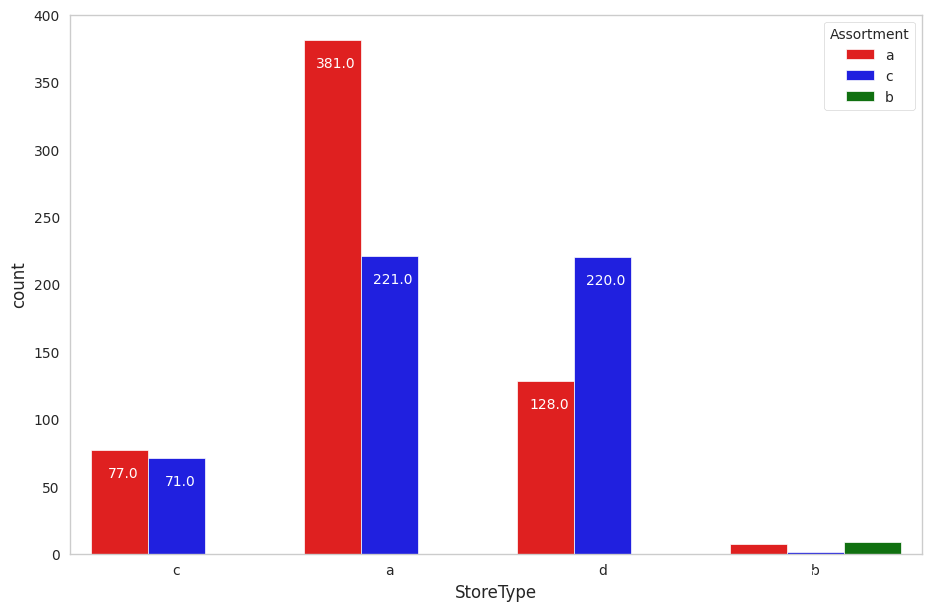

In [ ]:
# Define custom colors for each category in the 'Assortment' variable
custom_palette = {'a': 'red', 'b': 'green', 'c': 'blue'}

# Create countplot with specified hue colors
fig, ax = plt.subplots()
fig.set_size_inches(11, 7)
store_type = sns.countplot(x='StoreType', hue='Assortment', data=store_df, palette=custom_palette)

# Annotate the count values on top of each bar
for p in store_type.patches:
    store_type.annotate(f'\n{p.get_height()}', (p.get_x()+0.15, p.get_height()), ha='center', va='top', color='white', size=10)

plt.show()

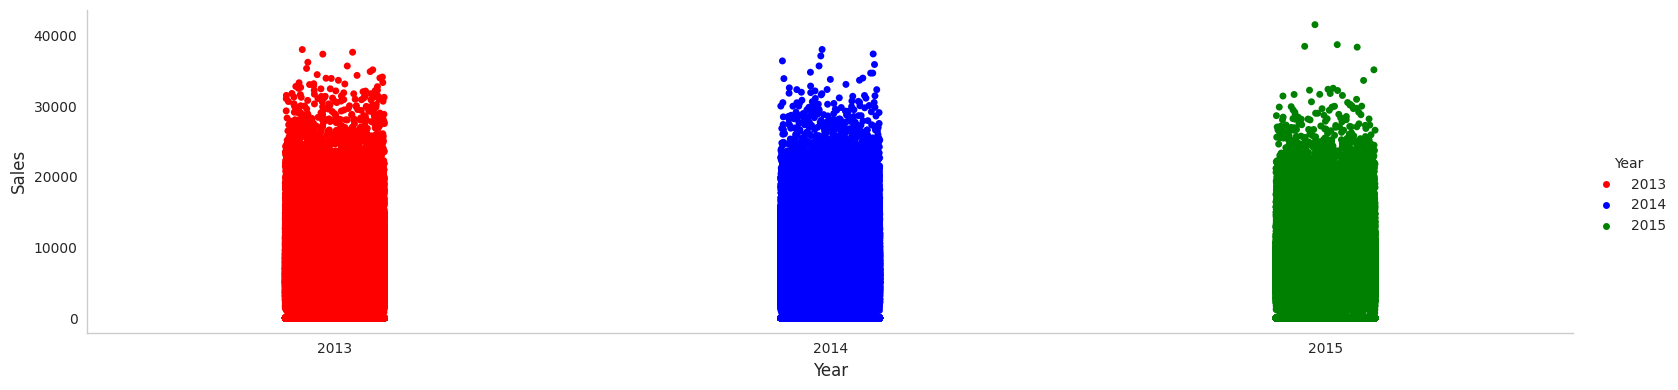

In [ ]:
#plotting year vs sales
custom_palette = ['red','blue', 'green']
sns.catplot(x='Year',y='Sales',data=rossmann_df,hue ='Year',palette = custom_palette, height=4, aspect=4 );

### **Merging Two Datasets**

In [ ]:
df = pd.merge(rossmann_df, store_df, how='left', on='Store')
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,SchoolHoliday,Year,Month,Day,WeekOfYear,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,2,2013-01-01,0,0,0,0,1,2013,1,1,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,2,2013-01-01,0,0,0,0,1,2013,1,1,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,2,2013-01-01,0,0,0,0,1,2013,1,1,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,2,2013-01-01,0,0,0,0,1,2013,1,1,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,2,2013-01-01,0,0,0,0,1,2013,1,1,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0


In [ ]:
df.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,SchoolHoliday,Year,Month,Day,WeekOfYear,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1017204,1111,5,2015-07-31,5723,422,1,1,1,2015,7,31,31,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1017205,1112,5,2015-07-31,9626,767,1,1,1,2015,7,31,31,c,c,1880.0,4.0,2006.0,0,0.0,0.0,0
1017206,1113,5,2015-07-31,7289,720,1,1,1,2015,7,31,31,a,c,9260.0,9.0,2013.0,0,0.0,0.0,0
1017207,1114,5,2015-07-31,27508,3745,1,1,1,2015,7,31,31,a,c,870.0,9.0,2013.0,0,0.0,0.0,0
1017208,1115,5,2015-07-31,8680,538,1,1,1,2015,7,31,31,d,c,5350.0,9.0,2013.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


In [ ]:
df.shape

(1017209, 21)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 21 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   SchoolHoliday              1017209 non-null  int64         
 8   Year                       1017209 non-null  int64         
 9   Month                      1017209 non-null  int64         
 10  Day                        1017209 non-null  int64         
 11  WeekOfYear                 1017209 no

## **EDA On Merged Dataset**

#### **Heatmap Of Merged Dataset**

<Axes: >

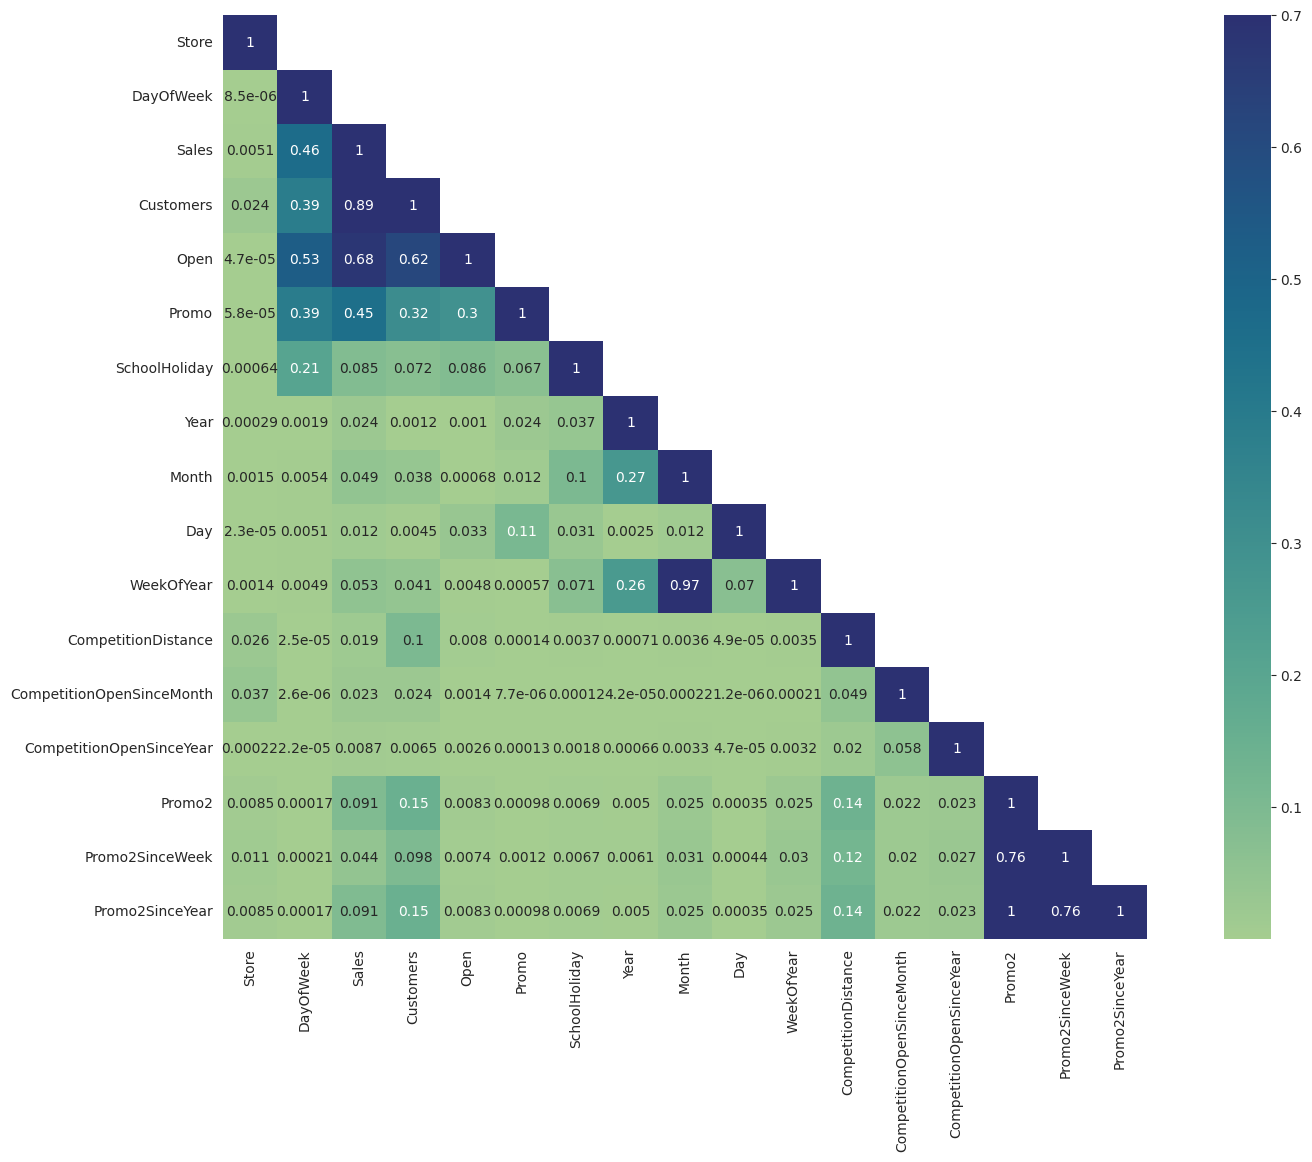

In [ ]:
correlation_map = df.corr(numeric_only=True).abs()
obj = np.array(correlation_map)
obj[np.tril_indices_from(obj)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,12)
sns.heatmap(correlation_map,mask=obj, vmax=.7, square=True, cmap='crest',annot=True)

In [ ]:
df["Avg_Customer_Sales"] = np.where(df["Customers"] == 0, 0, df["Sales"] / df["Customers"])

In [ ]:
df.isnull().sum()

Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
SchoolHoliday                0
Year                         0
Month                        0
Day                          0
WeekOfYear                   0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
Avg_Customer_Sales           0
dtype: int64

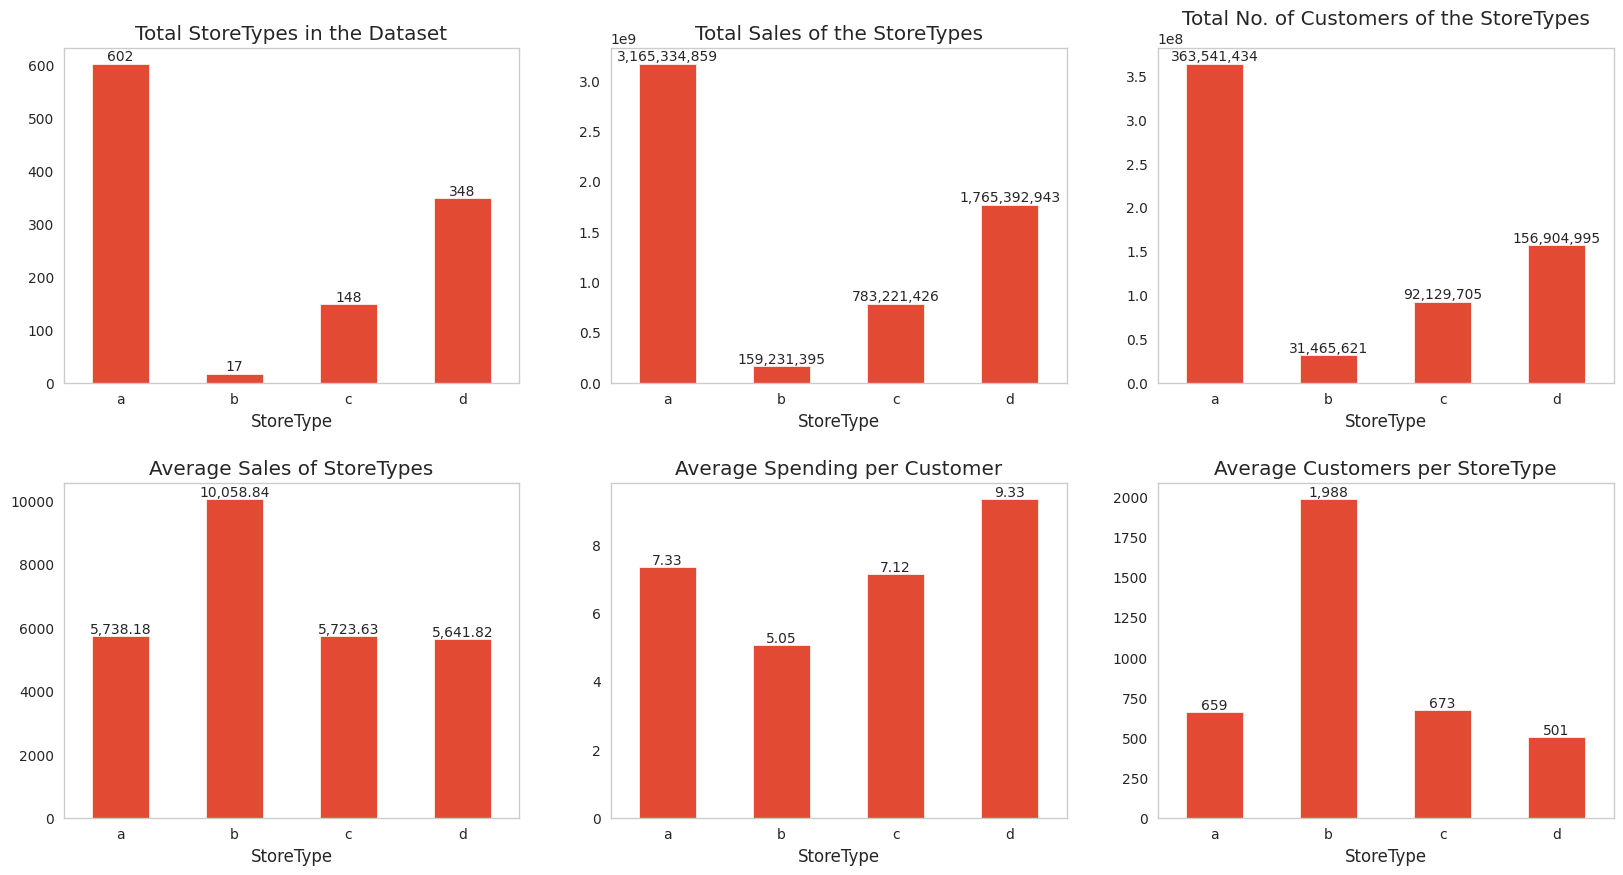

In [ ]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(2, 3, figsize=(20, 10))

store_count = store_df.groupby("StoreType")["Store"].count()
store_count.plot(kind="bar", ax=ax[0, 0], title="Total StoreTypes in the Dataset")
for p in ax[0, 0].patches:
    ax[0, 0].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', xytext=(0,0), textcoords='offset points')

sales_sum = df.groupby("StoreType")["Sales"].sum()
sales_sum.plot(kind="bar", ax=ax[0, 1], title="Total Sales of the StoreTypes")
for p in ax[0, 1].patches:
    ax[0, 1].annotate(f'{p.get_height():,.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', xytext=(0, 0), textcoords='offset points')

customers_sum = df.groupby("StoreType")["Customers"].sum()
customers_sum.plot(kind="bar", ax=ax[0, 2], title="Total No. of Customers of the StoreTypes")
for p in ax[0, 2].patches:
    ax[0, 2].annotate(f'{p.get_height():,.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', xytext=(0, 0), textcoords='offset points')

sales_mean = df.groupby("StoreType")["Sales"].mean()
sales_mean.plot(kind="bar", ax=ax[1, 0], title="Average Sales of StoreTypes")
for p in ax[1, 0].patches:
    ax[1, 0].annotate(f'{p.get_height():,.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', xytext=(0, 0), textcoords='offset points')

avg_cust_sales_mean = df.groupby("StoreType")["Avg_Customer_Sales"].mean()
avg_cust_sales_mean.plot(kind="bar", ax=ax[1, 1], title="Average Spending per Customer")
for p in ax[1, 1].patches:
    ax[1, 1].annotate(f'{p.get_height():,.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', xytext=(0, 0), textcoords='offset points')

customers_mean = df.groupby("StoreType")["Customers"].mean()
customers_mean.plot(kind="bar", ax=ax[1, 2], title="Average Customers per StoreType")
for p in ax[1, 2].patches:
    ax[1, 2].annotate(f'{p.get_height():,.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', xytext=(0, 0), textcoords='offset points')

for row in ax:
    for subplot in row:
        subplot.set_xticklabels(subplot.get_xticklabels(), rotation=0)

plt.subplots_adjust(hspace=0.3)
plt.show()


**As we can see from the graphs, the StoreType A has the most stores, sales and customers. However the StoreType D has the best averages spendings per customers. StoreType B, with only 17 stores has the most average customers.**

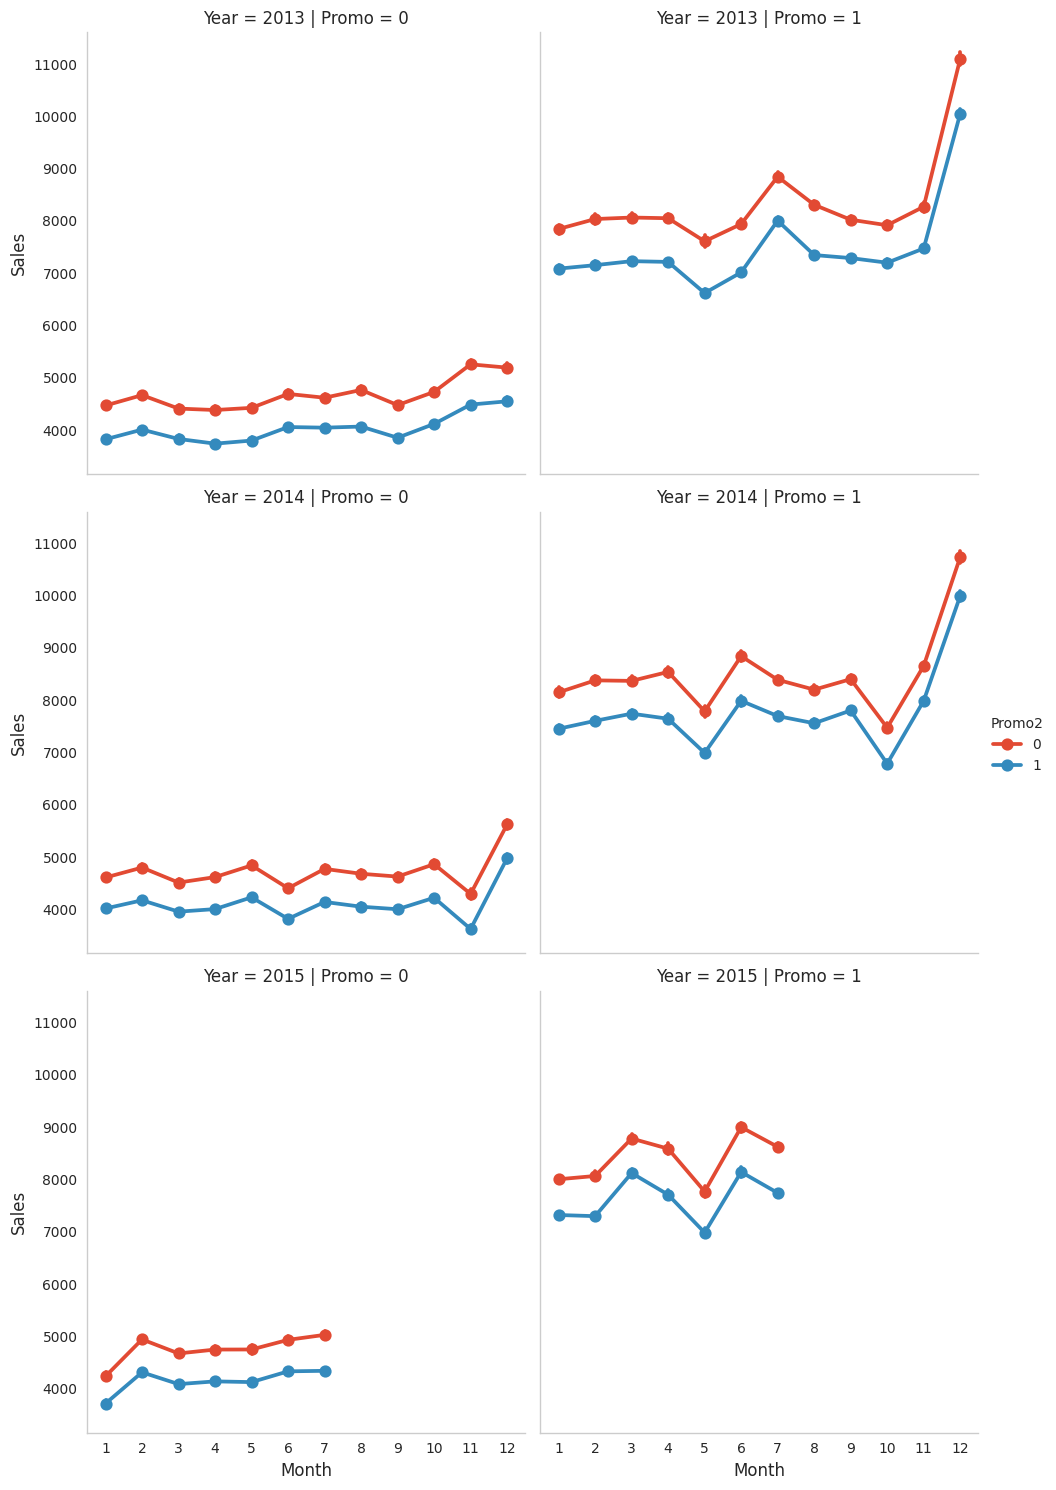

In [ ]:
sns.catplot(data=df, x="Month", y="Sales", col="Promo", hue="Promo2", row="Year", kind="point")

# So, of course, if the stores are having promotion the sells are higher.
# Overall the store promotions sellings are also higher than the seasionality promotions (Promo2). However I can't see no yearly trend.

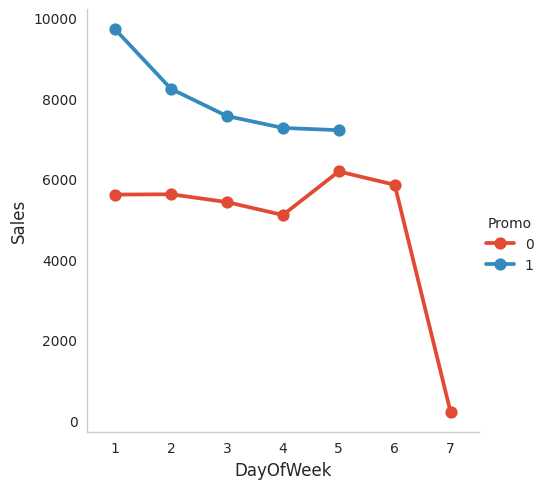

In [ ]:
sns.catplot(data=df, x="DayOfWeek", y="Sales", hue="Promo", kind="point")

**As we can see that when the promo is running Sales are high. ALso there is no promotion in the weekend.
The Sales are going down crazy on Sunday. No wonder.**

In [ ]:
print(df[(df.Open == 1) & (df.DayOfWeek == 7)].Store.unique().shape[0])

33


**So, There are 33 stores open on sundays.**

**Let's see the trends on a yearly basis.**

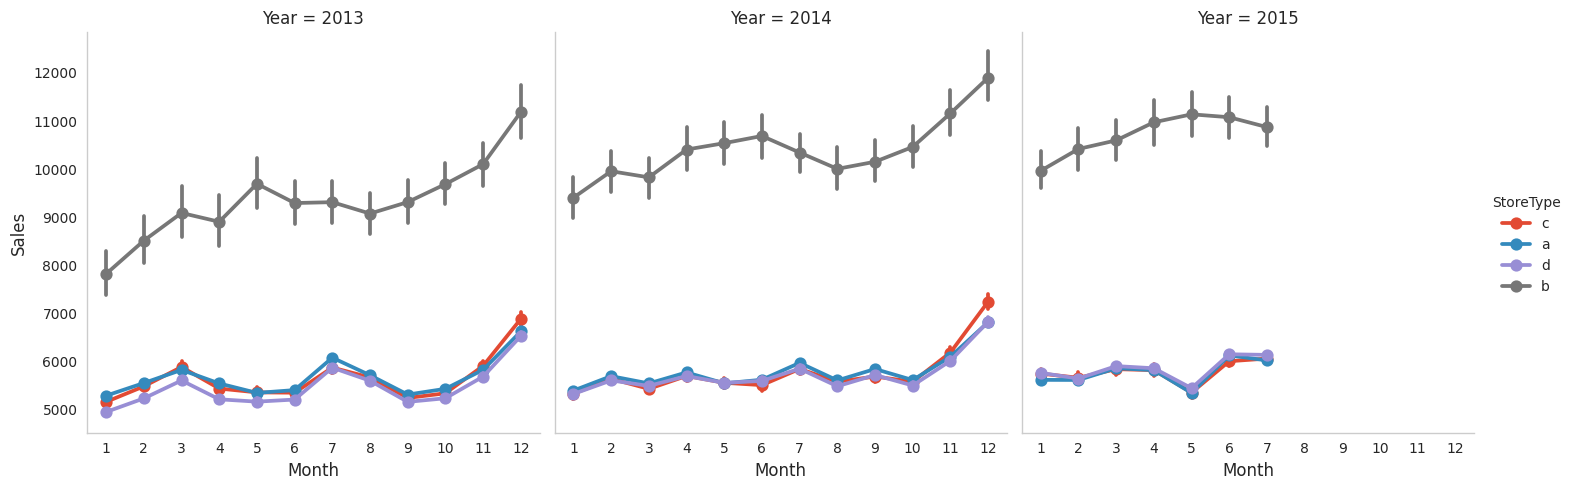

In [ ]:
sns.catplot(data=df, x="Month", y="Sales", col="Year", hue="StoreType", kind="point")

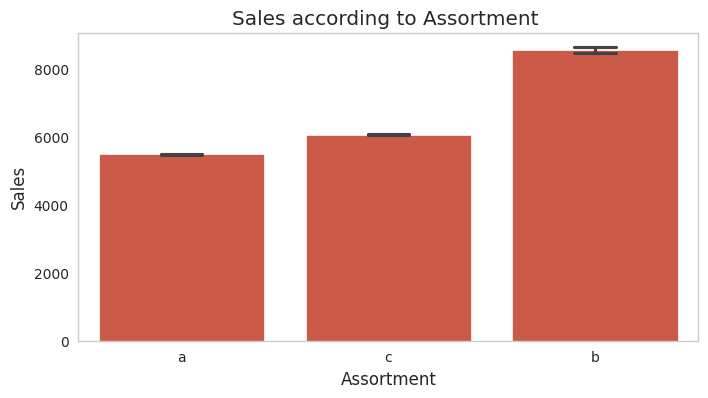

In [ ]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(8,4))
sns.barplot(data=df,x='Assortment',y='Sales',ax=ax,capsize=.2)
ax.set(title='Sales according to Assortment ')
plt.show()

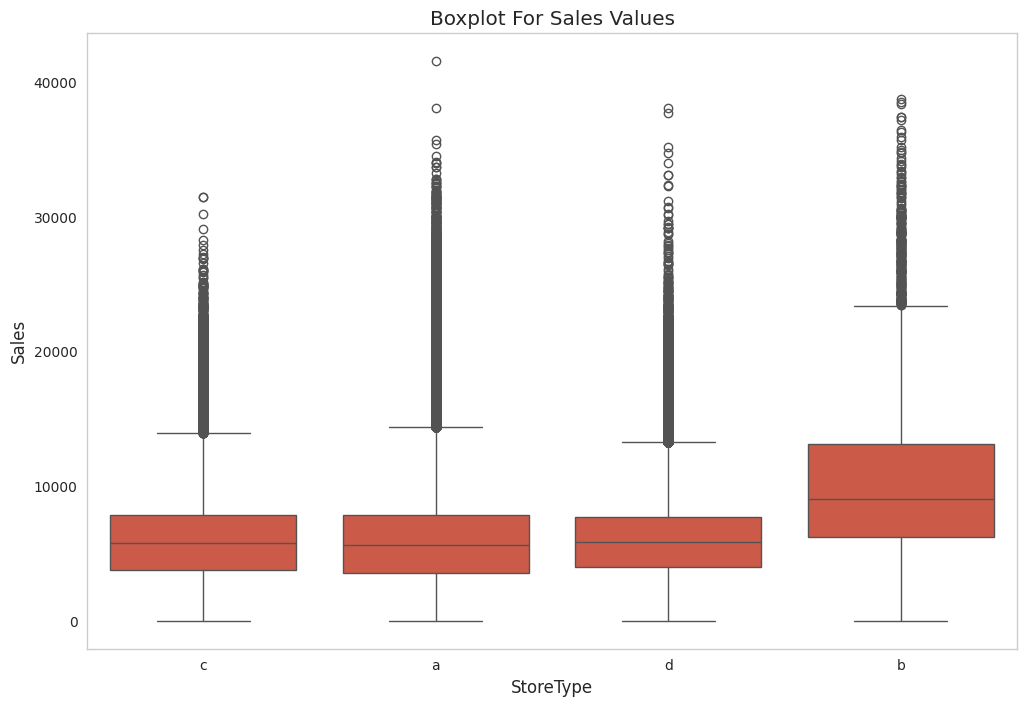

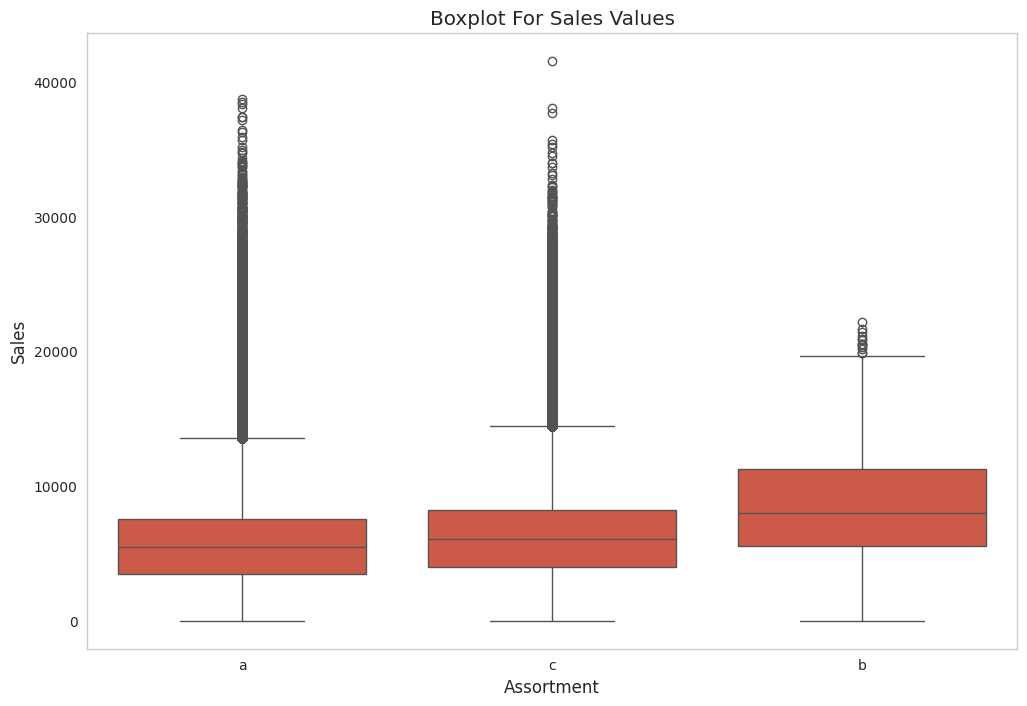

In [ ]:
for col in ['StoreType','Assortment']:
  plt.figure(figsize=(12, 8))
  plot_storetype_sales = sns.boxplot(x=col, y="Sales", data=df)
  plt.title('Boxplot For Sales Values')
plt.show()

In [ ]:
numerical_features = list(df.select_dtypes(include='number').columns)
numerical_features

['Store',
 'DayOfWeek',
 'Sales',
 'Customers',
 'Open',
 'Promo',
 'SchoolHoliday',
 'Year',
 'Month',
 'Day',
 'WeekOfYear',
 'CompetitionDistance',
 'CompetitionOpenSinceMonth',
 'CompetitionOpenSinceYear',
 'Promo2',
 'Promo2SinceWeek',
 'Promo2SinceYear',
 'Avg_Customer_Sales']

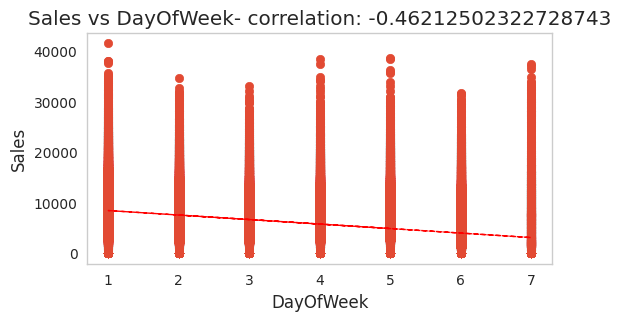

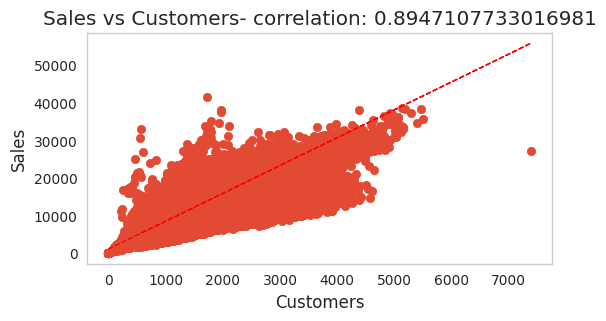

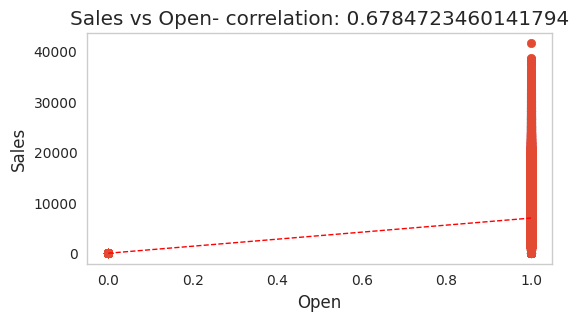

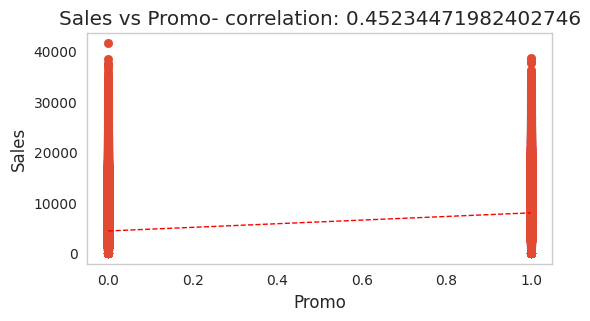

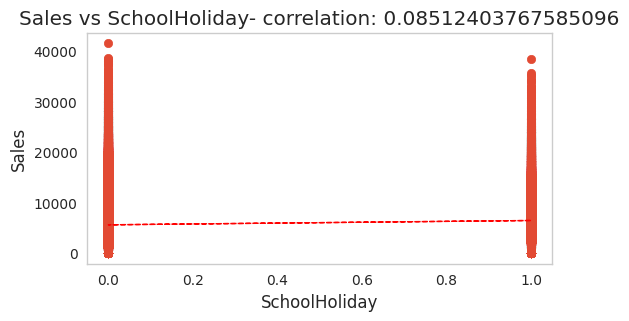

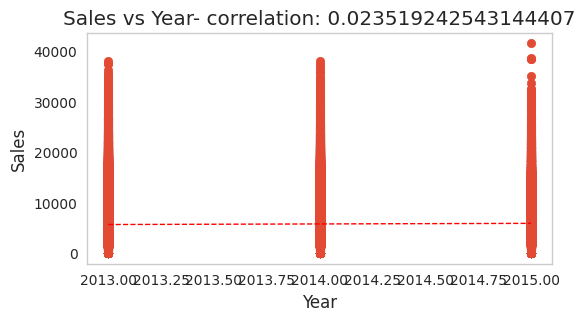

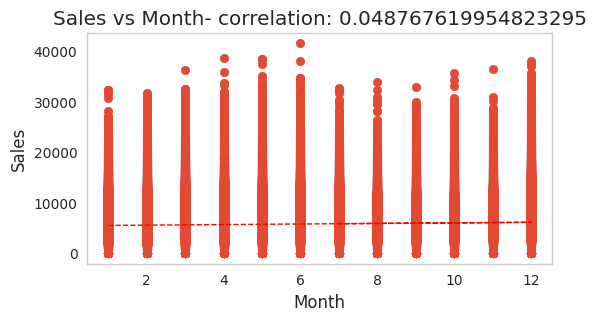

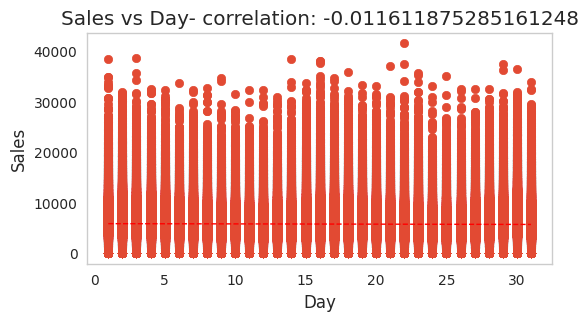

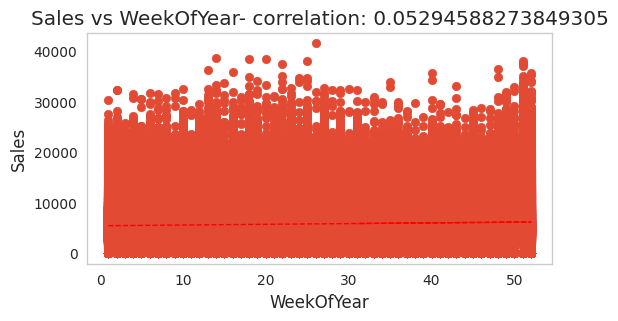

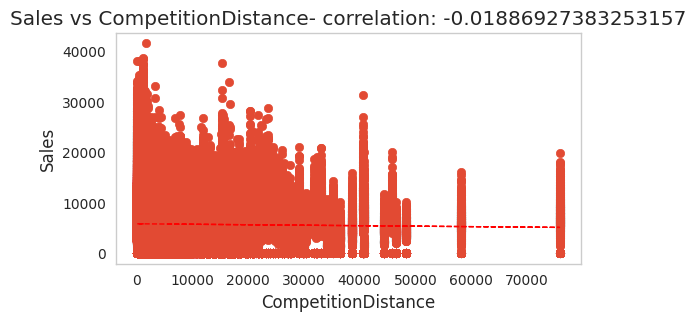

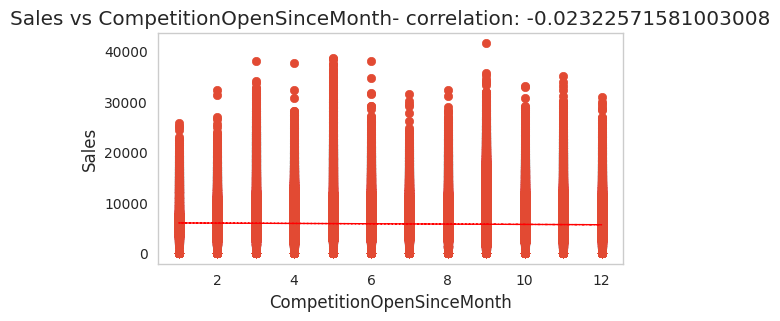

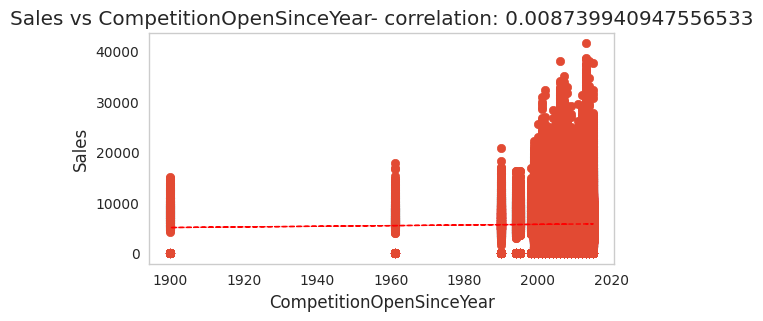

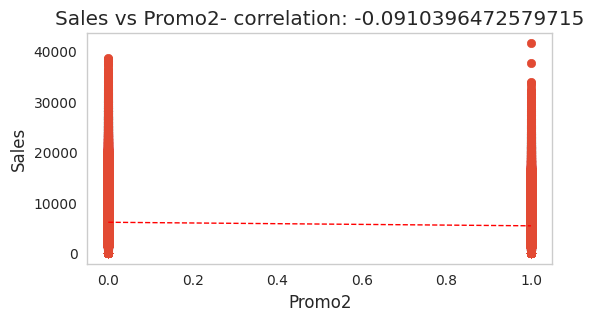

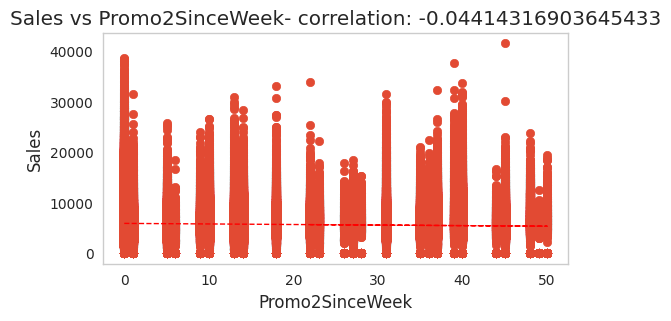

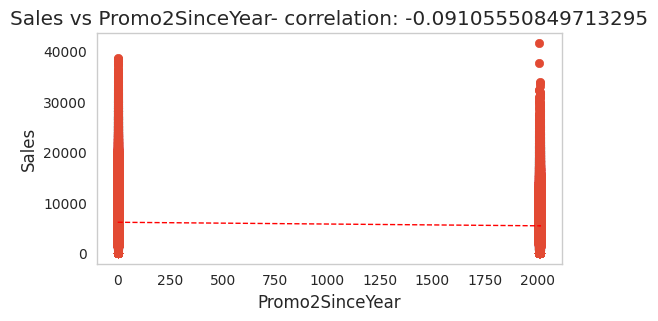

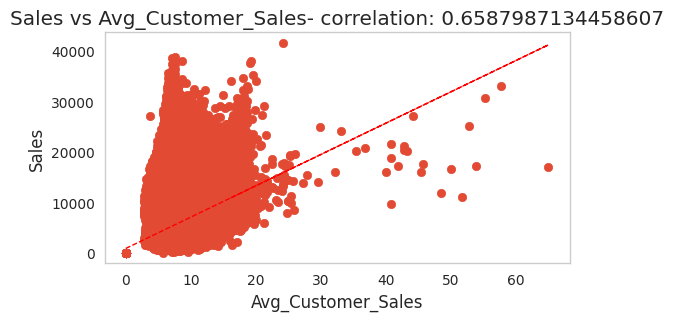

In [ ]:
for col in numerical_features:
  if col not in ['Store','Date','Sales']:
    fig = plt.figure(figsize=(6, 3))
    ax = fig.gca()
    feature = df[col]
    label = df['Sales']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Sales')
    ax.set_title('Sales vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(df[col], df['Sales'], 1)
    y_hat = np.poly1d(z)(df[col])

    plt.plot(df[col], y_hat, "r--", lw=1)

plt.show()

In [ ]:
df.drop('Avg_Customer_Sales',inplace=True,axis=1)

In [ ]:
numerical_features = list(df.select_dtypes(include='number').columns)
numerical_features

['Store',
 'DayOfWeek',
 'Sales',
 'Customers',
 'Open',
 'Promo',
 'SchoolHoliday',
 'Year',
 'Month',
 'Day',
 'WeekOfYear',
 'CompetitionDistance',
 'CompetitionOpenSinceMonth',
 'CompetitionOpenSinceYear',
 'Promo2',
 'Promo2SinceWeek',
 'Promo2SinceYear']

In [ ]:
#Dropping some unneccessary columns

df.drop(['Promo2SinceYear','Promo2SinceWeek','PromoInterval'],axis=1,inplace=True)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
#Multicollinearity

def calc_vif(X):
    # Ensure all columns have numeric data types
    X = X.select_dtypes(include=['number'])

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
calc_vif(df[[i for i in df.describe().columns if i not in ['Store','Sales','Open']]])

,variables,VIF
0,DayOfWeek,6.787207
1,Customers,3.672887
2,Promo,2.031226
3,SchoolHoliday,1.307532
4,Year,139438.631046
5,Month,68.091809
6,Day,4.513978
7,WeekOfYear,61.120604
8,CompetitionDistance,1.559488
9,CompetitionOpenSinceMonth,8.917503


In [ ]:
#Dropping some unneccessary columns

df.drop(["Year","CompetitionOpenSinceYear"],axis=1,inplace=True)

In [ ]:
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,SchoolHoliday,Month,Day,WeekOfYear,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,Promo2
0,1,2,2013-01-01,0,0,0,0,1,1,1,1,c,a,1270.0,9.0,0
1,2,2,2013-01-01,0,0,0,0,1,1,1,1,a,a,570.0,11.0,1
2,3,2,2013-01-01,0,0,0,0,1,1,1,1,a,a,14130.0,12.0,1
3,4,2,2013-01-01,0,0,0,0,1,1,1,1,c,c,620.0,9.0,0
4,5,2,2013-01-01,0,0,0,0,1,1,1,1,a,a,29910.0,4.0,0


In [ ]:
# where stores are closed, they won't generate sales, so we will remove that part of the dataset
df = df[df.Open != 0]

In [ ]:
# Open isn't a variable anymore, so we'll drop it too
df = df.drop('Open', axis=1)

In [ ]:
# Check if there's any opened store with zero sales
df[df.Sales == 0]['Store'].sum()

31460

In [ ]:
# see the percentage of open stored with zero sales
df[df.Sales == 0]['Sales'].sum()/df.Sales.sum()

0.0

In [ ]:
# remove this part of data to avoid bias
df = df[df.Sales != 0]

In [ ]:
df_new=df.copy()

In [ ]:
df_new = pd.get_dummies(df_new,columns=['StoreType','Assortment'])

In [ ]:
df_new.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,SchoolHoliday,Month,Day,WeekOfYear,CompetitionDistance,CompetitionOpenSinceMonth,Promo2,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c
84,85,2,2013-01-01,4220,619,0,1,1,1,1,1870.0,10.0,0,False,True,False,False,True,False,False
258,259,2,2013-01-01,6851,1444,0,1,1,1,1,210.0,9.0,0,False,True,False,False,False,True,False
261,262,2,2013-01-01,17267,2875,0,1,1,1,1,1180.0,5.0,0,False,True,False,False,True,False,False
273,274,2,2013-01-01,3102,729,0,1,1,1,1,3640.0,9.0,1,False,True,False,False,False,True,False
334,335,2,2013-01-01,2401,482,0,1,1,1,1,90.0,9.0,1,False,True,False,False,True,False,False


#### **Setting Features and Target Variables**

In [ ]:
X = df_new.drop(['Sales','Store','Date'] , axis = 1)
y= df_new.Sales

In [ ]:
X.shape

(844338, 17)

In [ ]:
X.head()

,DayOfWeek,Customers,Promo,SchoolHoliday,Month,Day,WeekOfYear,CompetitionDistance,CompetitionOpenSinceMonth,Promo2,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c
84,2,619,0,1,1,1,1,1870.0,10.0,0,False,True,False,False,True,False,False
258,2,1444,0,1,1,1,1,210.0,9.0,0,False,True,False,False,False,True,False
261,2,2875,0,1,1,1,1,1180.0,5.0,0,False,True,False,False,True,False,False
273,2,729,0,1,1,1,1,3640.0,9.0,1,False,True,False,False,False,True,False
334,2,482,0,1,1,1,1,90.0,9.0,1,False,True,False,False,True,False,False


In [ ]:
y.head()

84      4220
258     6851
261    17267
273     3102
334     2401
Name: Sales, dtype: int64

#### **Splitting Dataset Into Training Set and Test Set**

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=0)

In [ ]:
columns=X_train.columns
columns

Index(['DayOfWeek', 'Customers', 'Promo', 'SchoolHoliday', 'Month', 'Day',
       'WeekOfYear', 'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'Promo2', 'StoreType_a', 'StoreType_b', 'StoreType_c', 'StoreType_d',
       'Assortment_a', 'Assortment_b', 'Assortment_c'],
      dtype='object')

## **Implementing Supervised Machine Learning algorithms.**

## **1.  Linear Regression (OLS)**

In [ ]:
# Transforming data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Fitting Multiple Linear Regression to the Training set
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_train_predicted = regressor.predict(X_train)

In [ ]:
# Predicting the Test set results
y_test_predicted = regressor.predict(X_test)

In [ ]:
regressor.intercept_

-1553.9969616526978

In [ ]:
regressor.coef_

array([-2.38699174e+02,  5.44261788e+04,  1.15123104e+03,  2.80871668e+01,
        3.55401280e+02,  5.98490885e+01, -9.49041055e+01,  1.92127085e+03,
       -1.08809686e+02,  3.04073214e+02,  5.61140044e+02, -2.68208291e+03,
        4.19560291e+02,  1.70138257e+03,  1.25464781e+03, -2.82119689e+03,
        1.56654908e+03])

In [ ]:
train_score_1=regressor.score(X_train,y_train)
train_score_1

0.8242467000505348

In [ ]:
test_score_1=regressor.score(X_test,y_test)
test_score_1

0.8216997599563481

#Checking the Performance on train set

In [ ]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_lr= mean_squared_error(y_train,y_train_predicted)
print("MSE :",MSE_lr)

#calculate RMSE
RMSE_lr=np.sqrt(MSE_lr)
print("RMSE :",RMSE_lr)


#calculate MAE
MAE_lr= mean_absolute_error(y_train, y_train_predicted)
print("MAE :",MAE_lr)



#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_lr= r2_score(y_train, y_train_predicted)
print("R2 :",r2_lr)
Adjusted_R2_lr = (1-(1-r2_score(y_train, y_train_predicted))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_train_predicted))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

# Calculate MAPE (Mean Absolute Percentage Error)
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

MAPE_train = mean_absolute_percentage_error(y_train, y_train_predicted)
print("\nMean Absolute Percentage Error (MAPE) on Training Set:", MAPE_train)

MSE : 1699729.9296429593
RMSE : 1303.7369096727143
MAE : 949.9976517199707
R2 : 0.8242467000505348
Adjusted R2 : 0.8242349037819228

Mean Absolute Percentage Error (MAPE) on Training Set: 14.52467405147969


#Checking the Performance on test set

In [ ]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_lr= mean_squared_error(y_test, y_test_predicted)
print("MSE :",MSE_lr)

#calculate RMSE
RMSE_lr=np.sqrt(MSE_lr)
print("RMSE :",RMSE_lr)


#calculate MAE
MAE_lr= mean_absolute_error(y_test, y_test_predicted)
print("MAE :",MAE_lr)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_lr= r2_score((y_test), (y_test_predicted))
print("R2 :",r2_lr)
Adjusted_R2_lr = (1-(1-r2_score((y_test), (y_test_predicted)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",Adjusted_R2_lr )

# Calculate MAPE (Mean Absolute Percentage Error)
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

MAPE_test = mean_absolute_percentage_error(y_test, y_test_predicted)
print("\nMean Absolute Percentage Error (MAPE) on Test Set:", MAPE_test)

MSE : 1702100.2783832927
RMSE : 1304.6456524218722
MAE : 950.3955659733205
R2 : 0.8216997599563481
Adjusted R2 : 0.8216877927413613

Mean Absolute Percentage Error (MAPE) on Test Set: 14.535544440740471


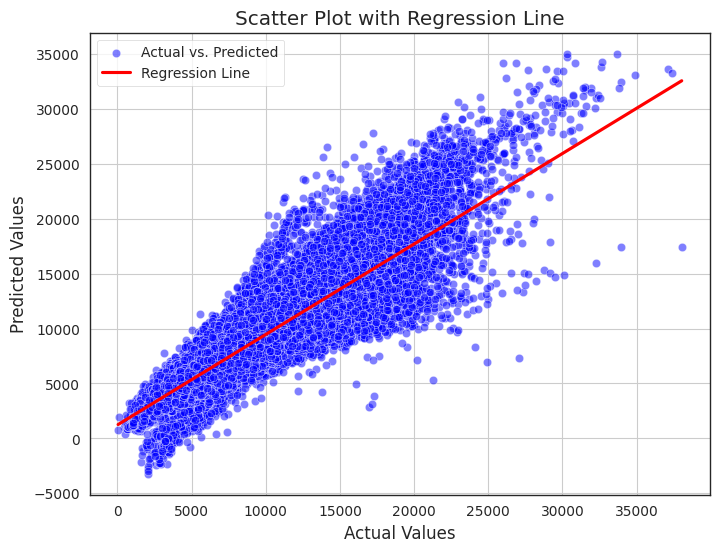

In [ ]:
# Plot actual vs. predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_test_predicted, color='blue', alpha=0.5, label='Actual vs. Predicted')

# Plot regression line
sns.regplot(x=y_test, y=y_test_predicted, scatter=False, color='red', label='Regression Line')

# Add labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot with Regression Line')

# Add legend
plt.legend()

# Show plot
plt.grid(True)
plt.show()


## **2. LARS Lasso Regression**

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
# Create a pipeline with StandardScaler and LassoLars
lass = make_pipeline(StandardScaler(with_mean=False), LassoLars(alpha=0.3, fit_intercept=False))

# Fit the pipeline to the training data
lass_reg = lass.fit(X_train, y_train)

In [ ]:
def rmse(x, y):
    return sqrt(mean_squared_error(x, y))

train_score_2=lass_reg.score(X_train, y_train)
test_score_2=lass_reg.score(X_test, y_test)

print("Regresion Model Score" , ":" , train_score_2  ,
      "\nOut of Sample Test Score" ,":" , test_score_2)

y_train_predicted = lass_reg.predict(X_train)
y_test_predicted = lass_reg.predict(X_test)

print("Training RMSE", ":", rmse(y_train, y_train_predicted),
      "\nTesting RMSE", ":", rmse(y_test, y_test_predicted))

MAPE_train = mean_absolute_percentage_error(y_train, y_train_predicted)
print("\nMean Absolute Percentage Error (MAPE) on Training Set:", MAPE_train)

MAPE_test = mean_absolute_percentage_error(y_test, y_test_predicted)
print("\nMean Absolute Percentage Error (MAPE) on Test Set:", MAPE_test)

Regresion Model Score : 0.8242459791857185 
Out of Sample Test Score : 0.8216967853138691
Training RMSE : 1303.7395833553833 
Testing RMSE : 1304.656535296148

Mean Absolute Percentage Error (MAPE) on Training Set: 14.521972722348018

Mean Absolute Percentage Error (MAPE) on Test Set: 14.532925268267324


## **3. Decision Tree Regression**

In [ ]:
tree = DecisionTreeRegressor()
treereg = tree.fit(X_train, y_train)

In [ ]:
train_score_3=treereg.score(X_train, y_train)
test_score_3=treereg.score(X_test, y_test)

print("Regresion Model Score" , ":" , train_score_3  ,
      "\nTest Score" ,":" , test_score_3)

y_train_predicted = treereg.predict(X_train)
y_test_predicted = treereg.predict(X_test)

print("Training RMSE", ":", rmse(y_train, y_train_predicted),
      "\nTesting RMSE", ":", rmse(y_test, y_test_predicted))

MAPE_train = mean_absolute_percentage_error(y_train, y_train_predicted)
print("\nMean Absolute Percentage Error (MAPE) on Training Set:", MAPE_train)

MAPE_test = mean_absolute_percentage_error(y_test, y_test_predicted)
print("\nMean Absolute Percentage Error (MAPE) on Test Set:", MAPE_test)

Regresion Model Score : 0.9999980282377432 
Test Score : 0.9365463504226632
Training RMSE : 4.366822017971894 
Testing RMSE : 778.2962006268426

Mean Absolute Percentage Error (MAPE) on Training Set: 0.0005537103072966582

Mean Absolute Percentage Error (MAPE) on Test Set: 7.391230170981772


In [ ]:
tree = DecisionTreeRegressor(criterion='friedman_mse', max_depth=8,
                      max_features=10, max_leaf_nodes=100,random_state=1)
treereg = tree.fit(X_train, y_train)

In [ ]:
train_score_4=treereg.score(X_train, y_train)
test_score_4=treereg.score(X_test, y_test)

print("Regresion Model Score" , ":" , train_score_4  ,
      "\nTest Score" ,":" , test_score_4)

y_train_predicted = treereg.predict(X_train)
y_test_predicted = treereg.predict(X_test)

print("Training RMSE", ":", rmse(y_train, y_train_predicted),
      "\nTesting RMSE", ":", rmse(y_test, y_test_predicted))

MAPE_train = mean_absolute_percentage_error(y_train, y_train_predicted)
print("\nMean Absolute Percentage Error (MAPE) on Training Set:", MAPE_train)

MAPE_test = mean_absolute_percentage_error(y_test, y_test_predicted)
print("\nMean Absolute Percentage Error (MAPE) on Test Set:", MAPE_test)

Regresion Model Score : 0.8099999529908599 
Test Score : 0.8073873136097337
Training RMSE : 1355.548532032752 
Testing RMSE : 1355.998008371243

Mean Absolute Percentage Error (MAPE) on Training Set: 15.020841285520776

Mean Absolute Percentage Error (MAPE) on Test Set: 15.056001241612984


### **Decision Tree With Hyper Parameter Tuning**

In [ ]:
tree = DecisionTreeRegressor()

params = {
          'min_samples_split':[2,3,5,7],
          'min_samples_leaf':[6,8,10],
          }

grid = RandomizedSearchCV(estimator= tree,param_distributions=params,verbose=True,cv=10)
 #choosing 10 K-Folds makes sure i went through all of the data and didn't miss any pattern.

grid.fit(X_train, y_train)
grid.best_params_

Fitting 10 folds for each of 10 candidates, totalling 100 fits


{'min_samples_split': 7, 'min_samples_leaf': 6}

**So, here are our best parameters for Decision Tree**

**{ min_samples_split = 3, min_samples_leaf = 6 }**

In [ ]:
tree = DecisionTreeRegressor(min_samples_leaf = 6, min_samples_split = 7)
treereg = tree.fit(X_train, y_train)

In [ ]:
train_score_5=treereg.score(X_train, y_train)
test_score_5=treereg.score(X_test, y_test)

print("Regresion Model Score" , ":" , train_score_5 ,
      "\nTest Score" ,":" , test_score_5)

y_train_predicted = treereg.predict(X_train)
y_test_predicted = treereg.predict(X_test)
print("Training RMSE", ":", rmse(y_train, y_train_predicted),
      "\nTesting RMSE", ":", rmse(y_test, y_test_predicted))

MAPE_train = mean_absolute_percentage_error(y_train, y_train_predicted)
print("\nMean Absolute Percentage Error (MAPE) on Training Set:", MAPE_train)

MAPE_test = mean_absolute_percentage_error(y_test, y_test_predicted)
print("\nMean Absolute Percentage Error (MAPE) on Test Set:", MAPE_test)

Regresion Model Score : 0.8099999529908599 
Test Score : 0.8073873136097337
Training RMSE : 1355.548532032752 
Testing RMSE : 1355.998008371243

Mean Absolute Percentage Error (MAPE) on Training Set: 15.020841285520776

Mean Absolute Percentage Error (MAPE) on Test Set: 15.056001241612984


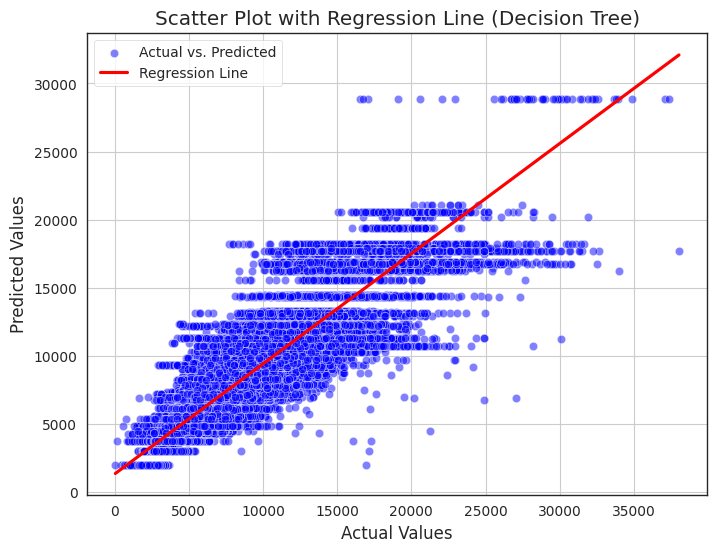

In [ ]:
# Plot actual vs. predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_test_predicted, color='blue', alpha=0.5, label='Actual vs. Predicted')

# Plot regression line (not meaningful for decision trees, included for consistency)
sns.regplot(x=y_test, y=y_test_predicted, scatter=False, color='red', label='Regression Line')

# Add labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot with Regression Line (Decision Tree)')

# Add legend
plt.legend()

# Show plot
plt.grid(True)
plt.show()

# **4. Support Vector Regression**

In [ ]:
#%%time
#from sklearn.svm import SVR
#svr=SVR(kernel = "linear")
#svr_reg=svr.fit(X_train,y_train)

In [ ]:
#train_score_6=svr_reg.score(X_train, y_train)
#test_score_6= svr_reg.score(X_test, y_test)

#print("Regresion Model Score" , ":" , train_score_6 ,
 #     "\nTest Score" ,":" , test_score_6)


#y_train_predicted = svr_reg.predict(X_train)
#y_test_predicted = svr_reg.predict(X_test)

#print("Training RMSE", ":", rmse(y_train, y_train_predicted),
 #     "Testing RMSE", ":", rmse(y_test, y_test_predicted))

#MAPE_train = mean_absolute_percentage_error(y_train, y_train_predicted)
#print("\nMean Absolute Percentage Error (MAPE) on Training Set:", MAPE_train)

#MAPE_test = mean_absolute_percentage_error(y_test, y_test_predicted)
#print("\nMean Absolute Percentage Error (MAPE) on Test Set:", MAPE_test)

## **5. K-Nearest Neighbors Regression**

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors = 30)
knnreg = knn.fit(X_train, y_train)

In [ ]:
train_score_7=knnreg.score(X_train, y_train)
test_score_7= knnreg.score(X_test, y_test)

print("Regresion Model Score" , ":" , train_score_7 ,
      "\nTest Score" ,":" , test_score_7)


y_train_predicted = knnreg.predict(X_train)
y_test_predicted = knnreg.predict(X_test)

print("Training RMSE", ":", rmse(y_train, y_train_predicted),
      "\nTesting RMSE", ":", rmse(y_test, y_test_predicted))

MAPE_train = mean_absolute_percentage_error(y_train, y_train_predicted)
print("\nMean Absolute Percentage Error (MAPE) on Training Set:", MAPE_train)

MAPE_test = mean_absolute_percentage_error(y_test, y_test_predicted)
print("\nMean Absolute Percentage Error (MAPE) on Test Set:", MAPE_test)

Regresion Model Score : 0.6406703847146622 
Test Score : 0.6100908131649125
Training RMSE : 1864.1666022358559 
Testing RMSE : 1929.2936789598364

Mean Absolute Percentage Error (MAPE) on Training Set: 21.742692710164636

Mean Absolute Percentage Error (MAPE) on Test Set: 22.618509282665244


### **6. Random Forest With Hyper Parameter Tuning**

In [ ]:
#another script that takes toooo long, to find the right parameters for RFR
rfr=RandomForestRegressor(n_jobs=-1)

params = {
        'n_estimators':[40,50,60,70,80,90],
          'min_samples_split':[2,3,6,8],
          'min_samples_leaf':[1,2,3,4],
          'max_depth':[None,5,15,30]
          }

 #the dimensionality is high, the number of combinations we have to search is enormous, using RandomizedSearchCV is a better option then GridSearchCV
grid = RandomizedSearchCV(estimator=rfr,param_distributions=params,verbose=True,cv=10)

 #choosing 10 K-Folds makes sure i went through all of the data and didn't miss any pattern.
grid.fit(X_train, y_train)
grid.best_params_

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [ ]:
rdf = RandomForestRegressor(n_estimators=40,min_samples_split=3, min_samples_leaf=1,max_depth=None,n_jobs=-1)
rdfreg = rdf.fit(X_train, y_train)

In [ ]:
train_score_8=rdfreg.score(X_train, y_train)
test_score_8=rdfreg.score(X_test, y_test)

print("Regresion Model Score" , ":" , train_score_8 ,
      "Test Score" ,":" , test_score_8)


y_train_predicted = rdfreg.predict(X_train)
y_test_predicted = rdfreg.predict(X_test)

print("Training RMSE", ":", rmse(y_train, y_train_predicted),
      "Testing RMSE", ":", rmse(y_test, y_test_predicted))

MAPE_train = mean_absolute_percentage_error(y_train, y_train_predicted)
print("\nMean Absolute Percentage Error (MAPE) on Training Set:", MAPE_train)

MAPE_test = mean_absolute_percentage_error(y_test, y_test_predicted)
print("\nMean Absolute Percentage Error (MAPE) on Test Set:", MAPE_test)

In [ ]:
y_test_predicted

In [ ]:
rf_prd = y_test_predicted
rf_real = y_test
dataset_rf = pd.DataFrame({'Real':rf_real,'PredictedRF':rf_prd})

In [ ]:
#storing absolute diffrences between actual sales price and predicted
dataset_rf['diff']=(dataset_rf['Real']-dataset_rf['PredictedRF']).abs()

In [ ]:
# taking 4 sample
dataset_rf.sample(4)

In [ ]:
#Statistical description of our predictions and actual values
dataset_rf.describe()

In [ ]:
#plotting the actual,predicted & difference of SALES
plt.style.use('seaborn')
dataset_rf.plot.hist(subplots=True, legend=False);

In [ ]:
#visualising our predictions
sns.lmplot(x='Real', y='PredictedRF', data=dataset_rf, line_kws={'color': 'red'}, size=6, aspect=1);

In [ ]:
def plot_feature_importance(importance,names,model_type):

  #Create arrays from feature importance and feature names
  feature_importance = np.array(importance)
  feature_names = np.array(names)

  #Create a DataFrame using a Dictionary
  data={'feature_names':feature_names,'feature_importance':feature_importance}
  fi_df = pd.DataFrame(data)

  #Sort the DataFrame in order decreasing feature importance
  fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

  #Define size of bar plot
  plt.figure(figsize=(10,8))
  #Plot Searborn bar chart
  sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
  #Add chart labels
  plt.title(model_type + ' FEATURE IMPORTANCE')
  plt.xlabel('FEATURE IMPORTANCE')
  plt.ylabel('FEATURE NAMES')

In [ ]:
plot_feature_importance(rdfreg.feature_importances_,columns[:],'RANDOM FOREST')

In [ ]:
score_df = pd.DataFrame({'Train_Score':[train_score_1,train_score_2,train_score_3,train_score_4,train_score_5,train_score_7,train_score_8],
                         'Test_Score':[test_score_1,test_score_2,test_score_3,test_score_4,test_score_5,test_score_7,test_score_8]},
                        index=['Linear Regression','Lasso Regression','Decision Tree',"Decision Tree(hyperparameters)","Decision Tree(TunedHyperparameters)",
                                "KNN Regression",'Random Forest Regression'])